## Load Libraries

In [1]:
suppressPackageStartupMessages({ 
    library(data.table) 
    library(dplyr) 
    library(ggplot2) 
    library(SingleCellExperiment)
    library(dplyr)
    library(celldex)
    library(SingleR)
    library(RColorBrewer)
    library(scater) 
    library(StabMap) 
    library(scran) 
    library(harmony) 
    library(patchwork)
    library(Seurat)
    library(plotly)
    library(pheatmap)
    library(batchelor)
    library(viridis)
    library(tradeSeq)
    library(reshape2)
    library(tidyr)
    #library(clusterExperiment)
    library(Cairo)
    library(ggridges)
    library(grid)
    library(png)
})

In [2]:
# Define the number of colors you want (e.g., 100)
n_colors <- 100
color <- plasma

# Get the Viridis color palette
palette <- color(n_colors)

# Invert the gradient by reversing the order of colors
inverted_palette <- rev(palette)

## Load in R Scripts that Contain Cell Type Colours Etc.

In [3]:
script_files <- list.files("projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/R_scripts", 
                           pattern = "\\.[rR]$", full.names = TRUE)

invisible(lapply(script_files, source))

## Set a Seed

In [4]:
set.seed(123)

## Data Locations

In [5]:
##### Load in Seurat Objects for post QC analyses #####

io = list()
io$main = "/rds/project/rds-SDzz0CATGms/users/ltgh2" # this is the main directory

# Set the working directory
setwd(io$main)

io$seqFISH_preQC = file.path(io$main, "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds") 

##### Load in StabMAP_Outputs #####
io$StabMAP_reweighted_MNNcorrected_original_counts_without_neigh_preQC = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_original_counts_without_neigh.Rds")
io$StabMAP_reweighted_MNNcorrected_integrated_counts_without_neigh_preQC = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_integrated_counts_without_neigh.Rds")

## Load in the seqFISH CellType Labels
io$seqFISH_labels_preQC = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_label_transfer/output/StabMAP_all_stages_reweighted_MNNcorrected_original_counts_without_neigh_LABELS.Rds")

## Load in the seqFISH UMAP coordinates
io$seqFISH_UMAP_preQC = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/stab_map_umap_generation/processed/StabMAP_allstage_MNNoriginal_UMAP.rds")

In [6]:
##### Load in Seurat Objects for post QC analyses #####

# Set the working directory
setwd(io$main)

io$atlas = file.path(io$main, "projects/03_seqFISH_FINAL/code/extended_atlas_integration/processed_downsampled/downsample_10K_within_timpoint_all_stages.Rds")
io$seqFISH = file.path(io$main, "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_after_QC_filtering_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds") 

##### Load in StabMAP_Outputs #####
io$StabMAP_reweighted_MNNcorrected_original_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_original_counts_without_neigh.Rds")
io$StabMAP_reweighted_MNNcorrected_integrated_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_integrated_counts_without_neigh.Rds")

## Load in the seqFISH CellType Labels
io$seqFISH_labels = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_label_transfer/output/StabMAP_all_stages_post_QC_reweighted_MNNcorrected_original_counts_without_neigh_LABELS.Rds")

## Load in the seqFISH Imputed Gene Expression
io$seqFISH_imputed_logcounts_e6 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e6_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e7 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e7_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_1 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo1_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_2 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo2_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_3 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo3_postQC_imputed_RNA.Rds")

## Load in the seqFISH Imputed RAW COUNTS Gene Expression
io$seqFISH_imputed_counts_e6 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e6_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e7 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e7_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e8_1 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_embryo_1_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e8_2 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_embryo_2_postQC_imputed_raw_RNA_counts.Rds")

io$seqFISH_imputed_counts_e8_3 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_embryo_3_postQC_imputed_raw_RNA_counts.Rds")


## Load in the seqFISH UMAP coordinates
io$seqFISH_UMAP = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/stab_map_umap_generation/processed/StabMAP_allstage_postQC_MNNoriginal_UMAP_seqFISH.rds")

In [7]:
## Load in the AP and DV Axes for the Early Embryos

io$seqFISH_scaled_APDV = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/generating_AP_DV_values/processed/APDV_raw_values_scaled_100_rank_normalized.Rds")

In [8]:
##### Load in the refined annotations and final metadata #####
io$FINAL_REFINED_ANNOTATIONS = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/1B_FINAL_REFINED_ANNOTATIONS_REVISIONS_POST_REVISION.Rds")

## Load in Seurat Objects and to the Seurat Object add the StabMAP UMAP, Transferred Cell Type Labels and Imputed Gene Expression Matrix

In [9]:
# Load in the seqFISH object_postQC
seqFISH = readRDS(io$seqFISH)

# Load in celltype, stage and anatomy labels
seqFISH_labels = readRDS(io$seqFISH_labels)
seqFISH <- AddMetaData(seqFISH, metadata = seqFISH_labels)

# Load in the StabMAP UMAP coordinates
seqFISH_UMAP = readRDS(io$seqFISH_UMAP)
seqFISH[["StabMAP_UMAP"]] <- seqFISH_UMAP

### this is the log normalized imputed gene expression from the 5 nearest neightbours using impute Embedding, fun = mean ####
# Load in the imputed gene expression 
seqFISH_imputed_logcounts_e6 = readRDS(io$seqFISH_imputed_logcounts_e6)
seqFISH_imputed_logcounts_e7 = readRDS(io$seqFISH_imputed_logcounts_e7)
seqFISH_imputed_logcounts_e8_1 = readRDS(io$seqFISH_imputed_logcounts_e8_1)
seqFISH_imputed_logcounts_e8_2 = readRDS(io$seqFISH_imputed_logcounts_e8_2)
seqFISH_imputed_logcounts_e8_3 = readRDS(io$seqFISH_imputed_logcounts_e8_3)

# Create a combined matrix of gene expression across all time points
imputed_expression <- cbind(seqFISH_imputed_logcounts_e6$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e7$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_1$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_2$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_3$scRNA.RNA)

# Creat a new assay object to store imputed data
imp <- CreateAssayObject(data = imputed_expression)

# add this assay to the previously created Seurat object
seqFISH[["imputed"]] <- imp

### this is the log normalized imputed gene expression from the 5 nearest neightbours using impute Embedding, fun = mean ####
# Load in the imputed gene expression 
seqFISH_imputed_counts_e6 = readRDS(io$seqFISH_imputed_counts_e6)
seqFISH_imputed_counts_e7 = readRDS(io$seqFISH_imputed_counts_e7)
seqFISH_imputed_counts_e8_1 = readRDS(io$seqFISH_imputed_counts_e8_1)
seqFISH_imputed_counts_e8_2 = readRDS(io$seqFISH_imputed_counts_e8_2)
seqFISH_imputed_counts_e8_3 = readRDS(io$seqFISH_imputed_counts_e8_3)

# Create a combined matrix of gene expression across all time points
imputed_counts_expression <- cbind(seqFISH_imputed_counts_e6$scRNA.RNA, 
                            seqFISH_imputed_counts_e7$scRNA.RNA, 
                            seqFISH_imputed_counts_e8_1$scRNA.RNA, 
                            seqFISH_imputed_counts_e8_2$scRNA.RNA, 
                            seqFISH_imputed_counts_e8_3$scRNA.RNA)

# Creat a new assay object to store imputed data
impcounts <- CreateAssayObject(counts = imputed_counts_expression)

# add this assay to the previously created Seurat object
seqFISH[["imputedcounts"]] <- impcounts

seqFISH_postQC <- seqFISH

seqFISH_postQC

# Load in celltype, stage and anatomy labels
FINAL_REFINED_ANNOTATIONS_UPDATED = readRDS(io$FINAL_REFINED_ANNOTATIONS)

FINAL_REFINED_ANNOTATIONS <- FINAL_REFINED_ANNOTATIONS_UPDATED %>% 
  select(-embryo)

seqFISH_postQC <- AddMetaData(seqFISH_postQC, metadata = FINAL_REFINED_ANNOTATIONS)

Warning message:
“Cannot add objects with duplicate keys (offending key: UMAP_), setting key to 'stabmap_umap_'”


An object of class Seurat 
56393 features across 63188 samples within 5 assays 
Active assay: across_timepoint_integration (351 features, 351 variable features)
 4 other assays present: originalexp, within_timepoint_integration, imputed, imputedcounts
 6 dimensional reductions calculated: pca, umap, spatial, Shila_PCA, Shila_UMAP, StabMAP_UMAP

## Generate AP and DV Hex Colours for Each Cell

In [10]:
# Function to convert AP values to hex color with specified limits
AP_to_hex <- function(AP) {
  scales::col_numeric(
    palette = c("blue", "red"),
    domain = c(0, 100), # Setting the limits from 0 to 200
    na.color = NA
  )(AP)
}

# Add a new column with hex colors
seqFISH_postQC@meta.data$AP_hex <- AP_to_hex(seqFISH_postQC@meta.data$AP)

# Function to convert DV values to hex color with specified limits
DV_to_hex <- function(DV) {
  scales::col_numeric(
    palette = c("purple", "orange"),
    domain = c(0, 100), # Setting the limits from 0 to 200
    na.color = NA
  )(DV)
}

# Add a new column with hex colors
seqFISH_postQC@meta.data$DV_hex <- DV_to_hex(seqFISH_postQC@meta.data$DV)

In [11]:
##add a cell_ID column
seqFISH_postQC@meta.data$cell_ID <- row.names(seqFISH_postQC@meta.data)

In [12]:
# Load in the seqFISH object_preQC
seqFISH_preQC = readRDS(io$seqFISH_preQC)

In [13]:
# extract the metadata from the seqFISH_postQC
seqFISH_postQC_meta <- seqFISH_postQC@meta.data

## Scale the Imputed Raw and Imputed Normalized Counts Data from 5 Nearest Neighbours

In [14]:
assay <- "imputedcounts"
seqFISH_postQC <- NormalizeData(seqFISH_postQC, assay = assay)
seqFISH_postQC <- ScaleData(seqFISH_postQC, assay = assay)

Centering and scaling data matrix



In [15]:
#assay <- "imputed"
##seqFISH_postQC <- NormalizeData(seqFISH_postQC, assay = assay)
#seqFISH_postQC <- ScaleData(seqFISH_postQC, assay = assay)

In [16]:
#assay <- "originalexp"
#seqFISH_postQC <- NormalizeData(seqFISH_postQC, assay = assay)
#seqFISH_postQC <- ScaleData(seqFISH_postQC, assay = assay)

## Plot AP Values in Space for Multiple Embryos

Warning message:
“Removed 1096 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1417 rows containing missing values (`geom_point()`).”


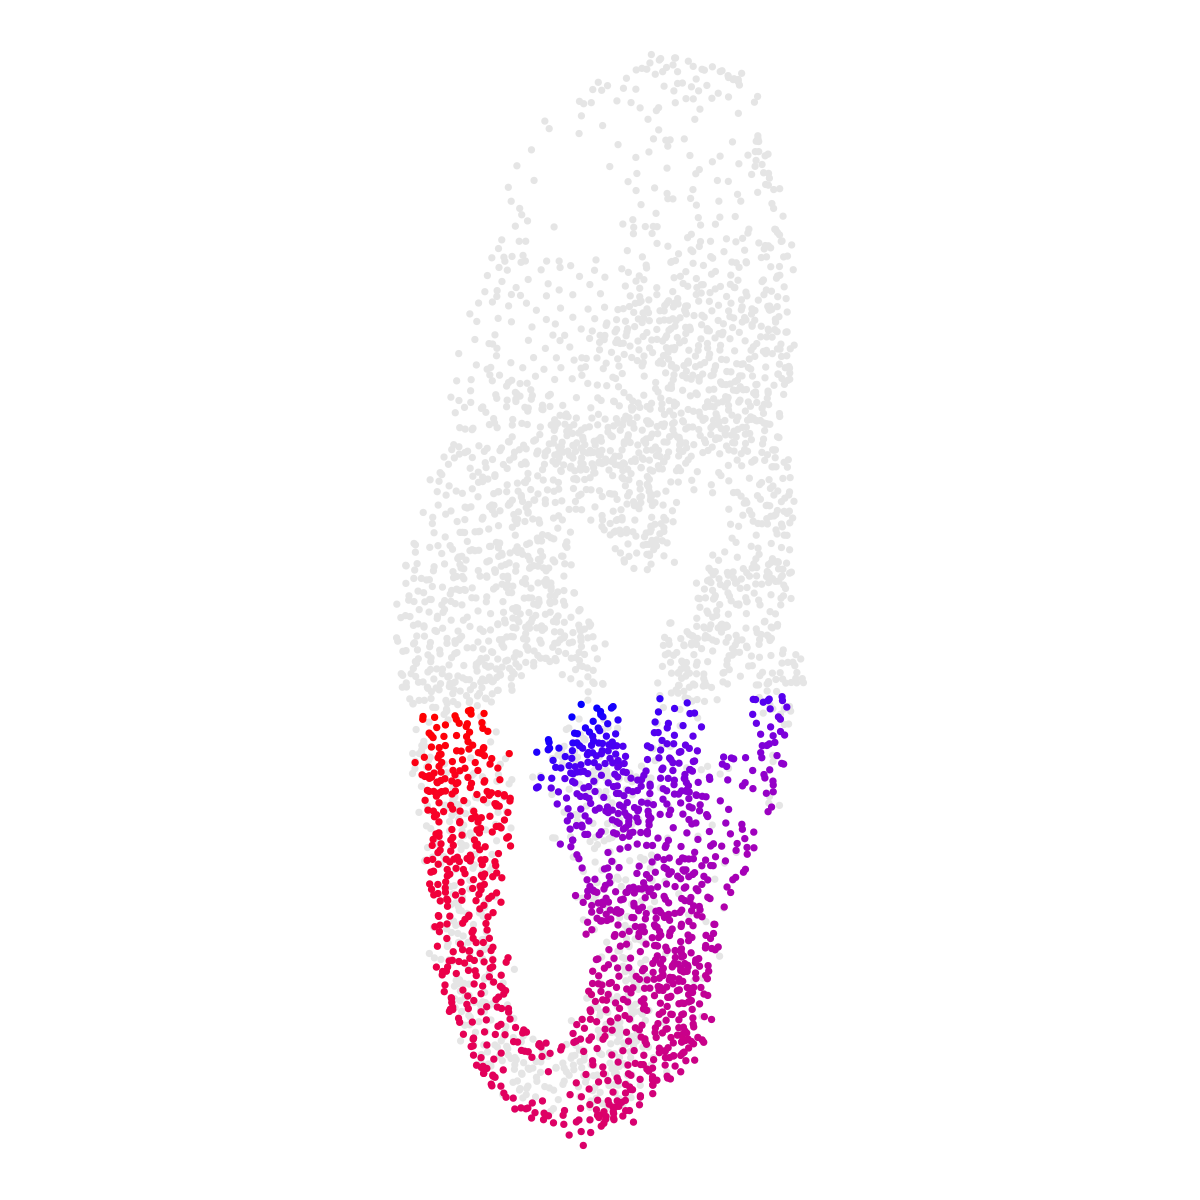

Warning message:
“Removed 1173 rows containing missing values (`geom_point()`).”


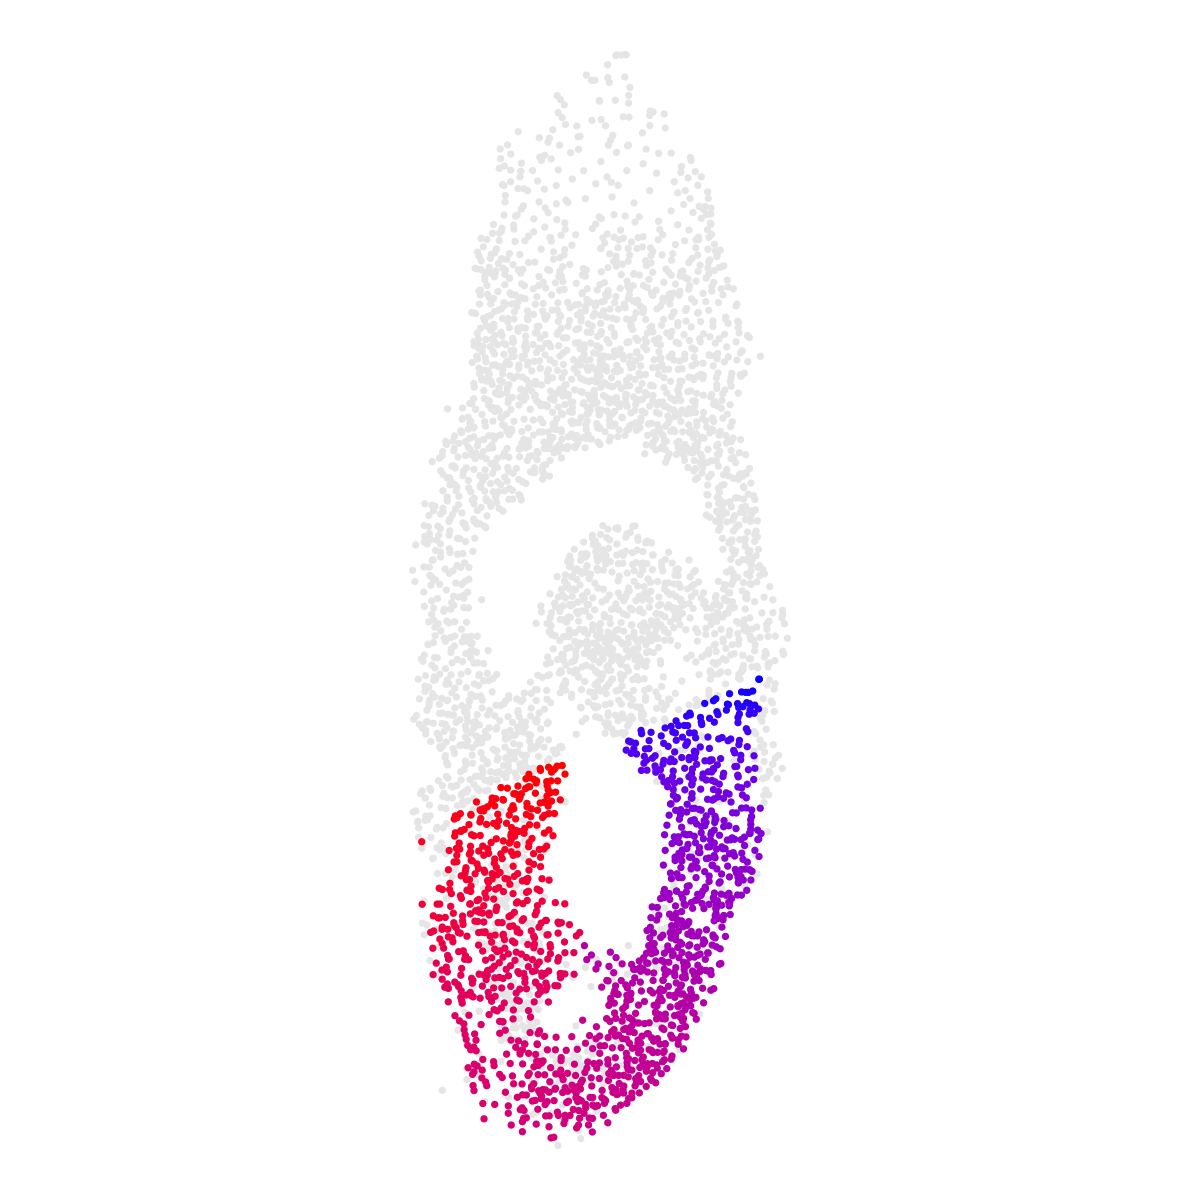

Warning message:
“Removed 38 rows containing missing values (`geom_point()`).”


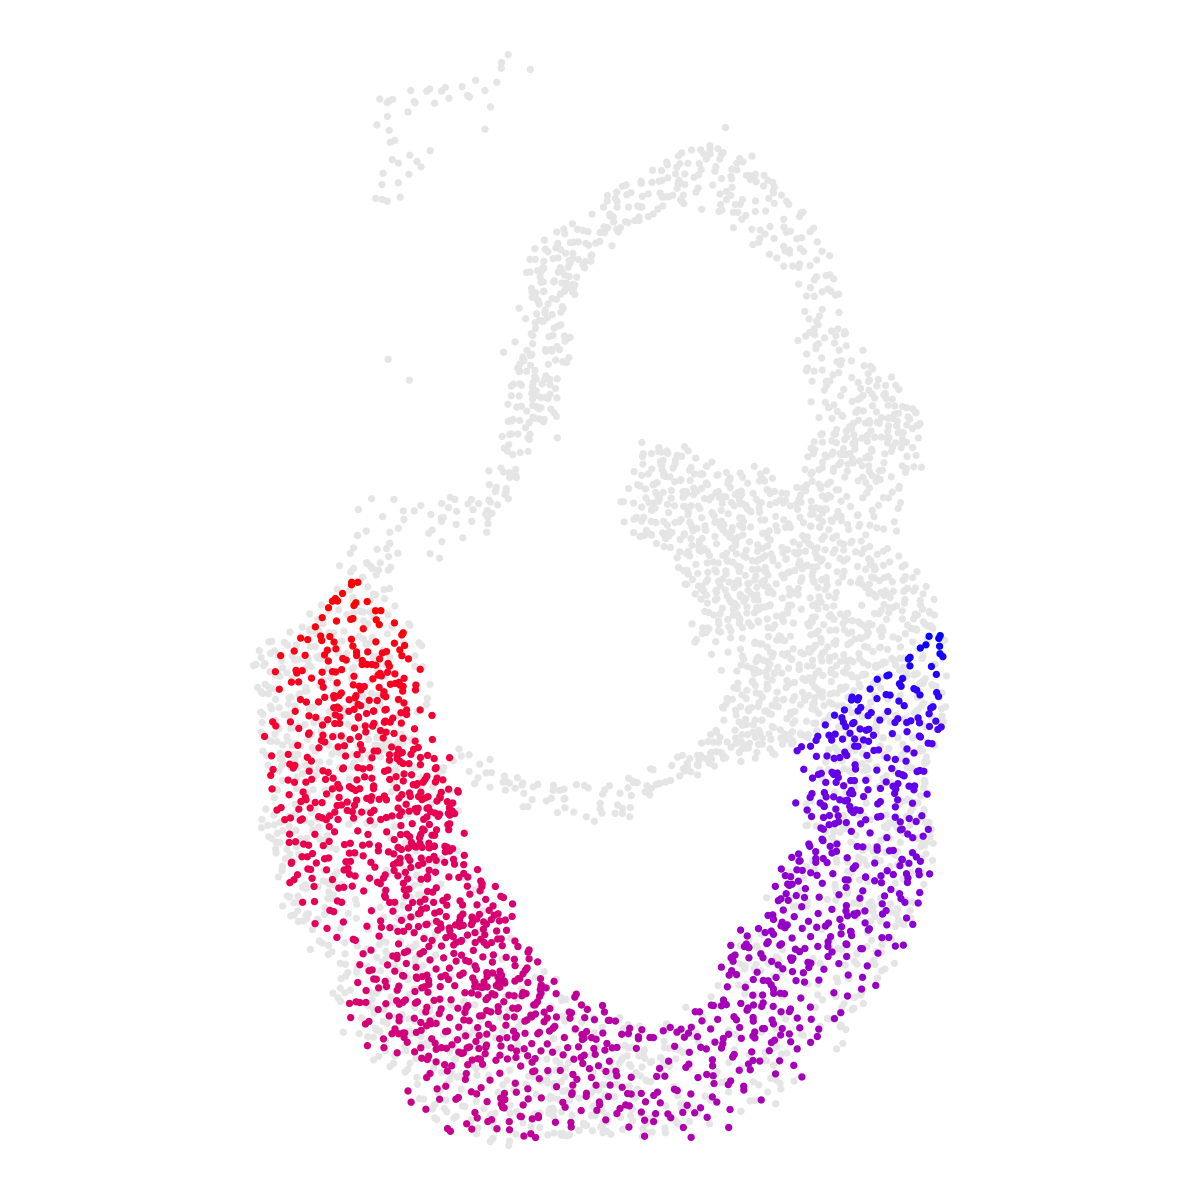

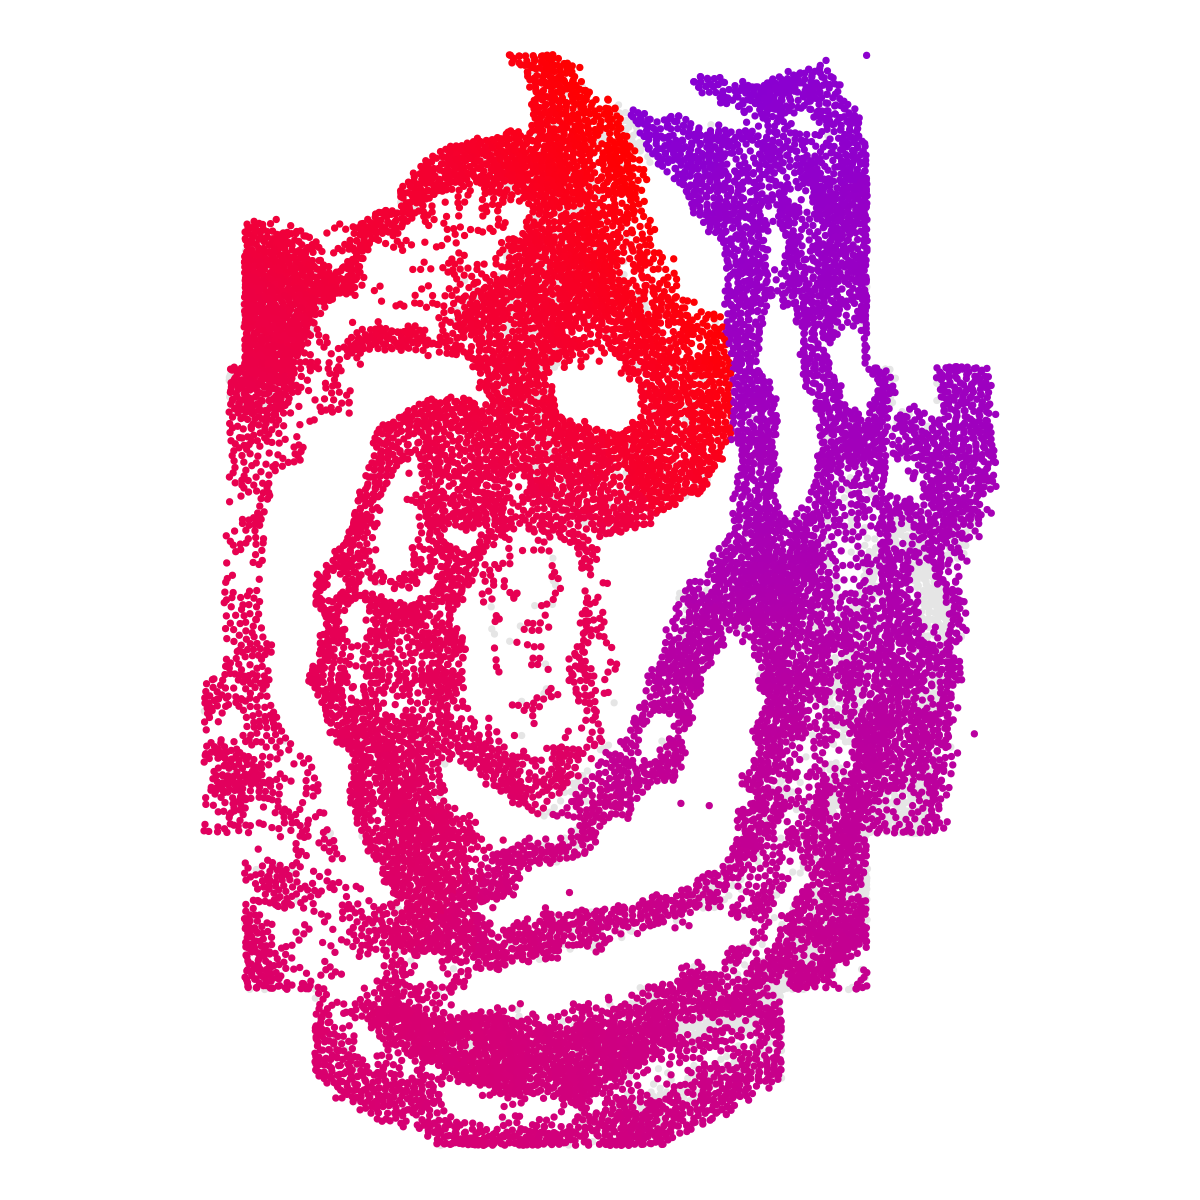

In [17]:
plot_AP_values <- function(seqFISH_postQC, seqFISH_preQC, 
                           cell_type_to_plot = "Epiblast", 
                           min_AP = 50, max_AP = 100, 
                           pt_size = 1, 
                           min_DV = 30, max_DV = 100, 
                           embryo_to_plot = "embryo_7",
                           output_dir = NULL,   # Add default value
                           file_name = "plot.pdf") {  # Add default value{
  
  # Extract meta.data
  seqFISH_postQC_meta <- seqFISH_postQC@meta.data
  seqFISH_preQC_meta <- seqFISH_preQC@meta.data
  
  options(repr.plot.width=10, repr.plot.height=10)
  
  # Calculate ranges
  AP_pos_max <- max(seqFISH_postQC_meta$AP, na.rm = TRUE)
  AP_pos_min <- min(seqFISH_postQC_meta$AP, na.rm = TRUE)
  
  DV_pos_max <- max(seqFISH_postQC_meta$DV, na.rm = TRUE)
  DV_pos_min <- min(seqFISH_postQC_meta$DV, na.rm = TRUE)
  
  dim2_max <- max(seqFISH_postQC_meta$dim2, na.rm = TRUE)
  dim2_min <- min(seqFISH_postQC_meta$dim2, na.rm = TRUE)
  
  ## Plot AP Values
  upper_bound <- AP_pos_max
  lower_bound <- AP_pos_min
  
  p1 <- ggplot(seqFISH_postQC_meta[seqFISH_postQC_meta$embryo == embryo_to_plot & 
                                    seqFISH_postQC_meta$joint_clusters_pass_QC == TRUE &
                                    seqFISH_postQC_meta$AP >= min_AP & 
                                    seqFISH_postQC_meta$AP <= max_AP & 
                                    seqFISH_postQC_meta$DV >= min_DV & 
                                    seqFISH_postQC_meta$DV <= max_DV , ], aes(dim1, dim2, col=AP)) + 
    geom_point(data=seqFISH_preQC_meta[seqFISH_preQC_meta$embryo == embryo_to_plot, ], col='grey90', size = 1) + 
    geom_point(size = pt_size) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound)) + 
    theme_void() + 
    theme(legend.position='none') + 
    coord_fixed()
  
  print(p1)
}


# Example usage:
p1 <- plot_AP_values(seqFISH_postQC, seqFISH_preQC,
               min_AP = 0, max_AP = 100,
               pt_size = 1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo6")

p2 <- plot_AP_values(seqFISH_postQC, seqFISH_preQC,
               min_AP = 0, max_AP = 100,
               pt_size = 1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo7")


p3 <- plot_AP_values(seqFISH_postQC, seqFISH_preQC,
               min_AP = 0, max_AP = 100,
               pt_size = 1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo4")

p4 <- plot_AP_values(seqFISH_postQC, seqFISH_preQC,
               min_AP = 0, max_AP = 100,
               pt_size = 1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo1")

In [18]:
colnames(FINAL_REFINED_ANNOTATIONS_UPDATED)

[1] "cell_ID"                                             
 [2] "orig.ident"                                          
 [3] "nCount_RNA"                                          
 [4] "nFeature_RNA"                                        
 [5] "seqFISH_celltype"                                    
 [6] "extended_atlas_celltype"                             
 [7] "AP"                                                  
 [8] "DV"                                                  
 [9] "dataset"                                             
[10] "cluster"                                             
[11] "subcluster"                                          
[12] "cluster_subcluster"                                  
[13] "stage"                                               
[14] "anatomy"                                             
[15] "UMAP_1"                                              
[16] "UMAP_2"                                              
[17] "celltype_PijuanSala2019"                             
[18] "majority_seqFISH_celltype"                           
[19] "majority_seqFISH_celltype_proportion"                
[20] "majority_extended_atlas_celltype"                    
[21] "majority_extended_atlas_celltype_proportion"         
[22] "majority_celltype_PijuanSala2019_celltype"           
[23] "majority_celltype_PijuanSala2019_celltype_proportion"
[24] "stage_transfer"                                      
[25] "poor_stage_alignment"                                
[26] "proportion_seqFISH_cells_per_subcluster"             
[27] "joint_clusters_pass_QC"                              
[28] "stage_alignment_pass_QC"                             
[29] "passed_QC"                                           
[30] "refined_annotation"                                  
[31] "embryo"

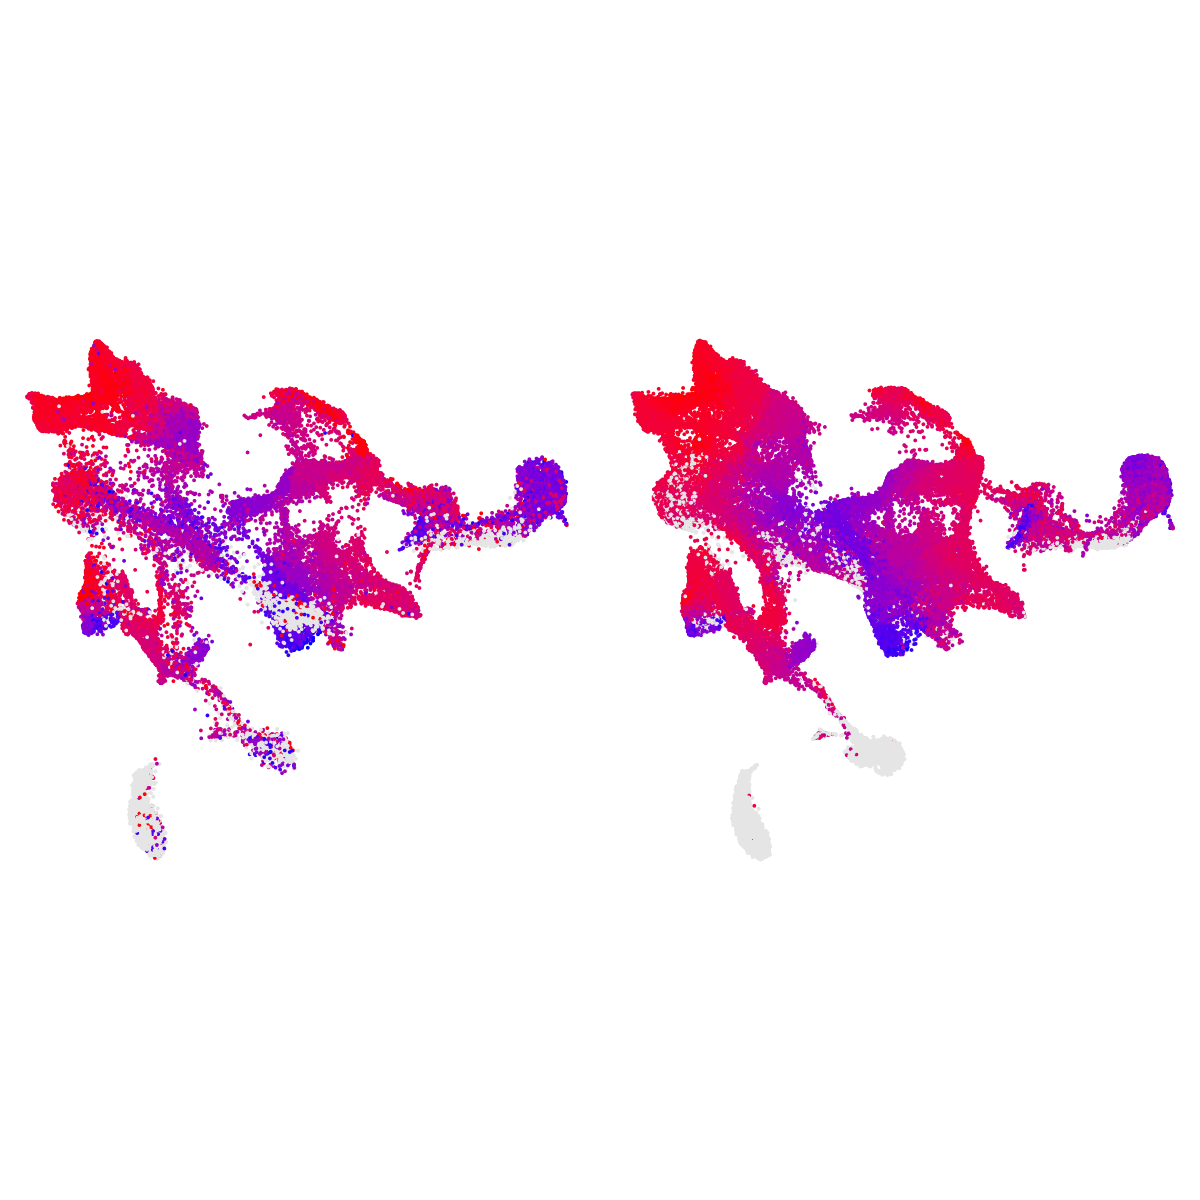

In [19]:
pt_size = 0.01
  upper_bound <- 100
  lower_bound <- 0
  
FINAL_REFINED_ANNOTATIONS_UPDATED$dataset <- factor(
  FINAL_REFINED_ANNOTATIONS_UPDATED$dataset,
  levels = c("seqFISH", "scRNA")  # Replace with your desired levels
)

p4 <- ggplot(FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE, ], aes(UMAP_1, UMAP_2, col=AP)) + 
    geom_point(data=FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE, ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    ggtitle(NULL) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound), na.value = "grey90") + 
    theme_void() + 
    theme(legend.position='none',
    strip.text = element_blank()) + 
    coord_fixed() + 
    facet_wrap(~dataset)
p4

In [20]:
pt_size = 0.01
  upper_bound <- 100
  lower_bound <- 0
  
FINAL_REFINED_ANNOTATIONS_UPDATED$dataset <- factor(
  FINAL_REFINED_ANNOTATIONS_UPDATED$dataset,
  levels = c("seqFISH", "scRNA")  # Replace with your desired levels
)

p5 <- ggplot(FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA" & 
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$anatomy == "Anterior section", ], aes(UMAP_1, UMAP_2, col=AP)) + 
    geom_point(data=FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                                      FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA", ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    ggtitle(NULL) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound), na.value = "grey90") + 
    theme_void() + 
    theme(legend.position='none',
    strip.text = element_blank()) + 
    coord_fixed()

p6 <- ggplot(FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA" & 
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$anatomy == "Medial section", ], aes(UMAP_1, UMAP_2, col=AP)) + 
    geom_point(data=FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                                      FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA", ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    ggtitle(NULL) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound), na.value = "grey90") + 
    theme_void() + 
    theme(legend.position='none',
    strip.text = element_blank()) + 
    coord_fixed()

p7 <- ggplot(FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA" & 
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$anatomy == "Posterior section", ], aes(UMAP_1, UMAP_2, col=AP)) + 
    geom_point(data=FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                                      FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA", ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    ggtitle(NULL) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound), na.value = "grey90") + 
    theme_void() + 
    theme(legend.position='none',
    strip.text = element_blank()) + 
    coord_fixed()

p8 <- ggplot(FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA" & 
                                               FINAL_REFINED_ANNOTATIONS_UPDATED$anatomy == "Pooled", ], aes(UMAP_1, UMAP_2, col=AP)) + 
    geom_point(data=FINAL_REFINED_ANNOTATIONS_UPDATED[FINAL_REFINED_ANNOTATIONS_UPDATED$passed_QC == TRUE &
                                                      FINAL_REFINED_ANNOTATIONS_UPDATED$dataset == "scRNA", ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    ggtitle(NULL) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound), na.value = "grey90") + 
    theme_void() + 
    theme(legend.position='none',
    strip.text = element_blank()) + 
    coord_fixed()

In [21]:
table(FINAL_REFINED_ANNOTATIONS_UPDATED$anatomy)


         Anterior  Anterior section                EP    Medial section 
             1809             10417             38232             11313 
           Pooled         Posterior Posterior section                YS 
           111278              1472              4490              9736 

#### Generating Combined Panels

In [45]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 3.5, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)
p4_raster <- rasterize_plot(p4)
#p5_raster <- rasterize_plot(p5)
#p6_raster <- rasterize_plot(p6)
#p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
#p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
#p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
#p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3, p4,
  ncol = 4, nrow = 1) +
  plot_layout(
    widths = c(1, 1, 1, 1),
    heights = c(1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/AP_values_SPATIAL_2.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, width = (150/4), height = ((200/4)*1/5))
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

ERROR: Error in Cairo(width, height, file, "pdf", pointsize = pointsize, bg = bg, : Failed to create Cairo backend!


In [24]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 3.5, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)
p4_raster <- rasterize_plot(p4)
#p5_raster <- rasterize_plot(p5)
#p6_raster <- rasterize_plot(p6)
#p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
#p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
#p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
#p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p4,
  ncol = 1, nrow = 1) +
  plot_layout(
    widths = c(3),
    heights = c(1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/AP_values_UMAP.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, width = (150/4), height = ((200/4)*1/5))
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

ERROR: Error in Cairo(width, height, file, "pdf", pointsize = pointsize, bg = bg, : Failed to create Cairo backend!


In [25]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 3.5, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p5)
p2_raster <- rasterize_plot(p6)
p3_raster <- rasterize_plot(p7)
p4_raster <- rasterize_plot(p8)
#p5_raster <- rasterize_plot(p5)
#p6_raster <- rasterize_plot(p6)
#p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
#p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
#p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
#p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3, p4,
  ncol = 1, nrow = 4) +
  plot_layout(
    widths = c(1),
    heights = c(1,1,1,1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/AP_values_UMAP_split_by_anatomy.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, height = (150/4), width = ((200/4)*1/5))
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

ERROR: Error in Cairo(width, height, file, "pdf", pointsize = pointsize, bg = bg, : Failed to create Cairo backend!


## Plot Cells in Space Related to Tradeseq Subset

Warning message:
“Removed 251 rows containing missing values (`geom_point()`).”


ERROR: Error in Cairo(width, height, file, "pdf", pointsize = pointsize, bg = bg, : Failed to create Cairo backend!


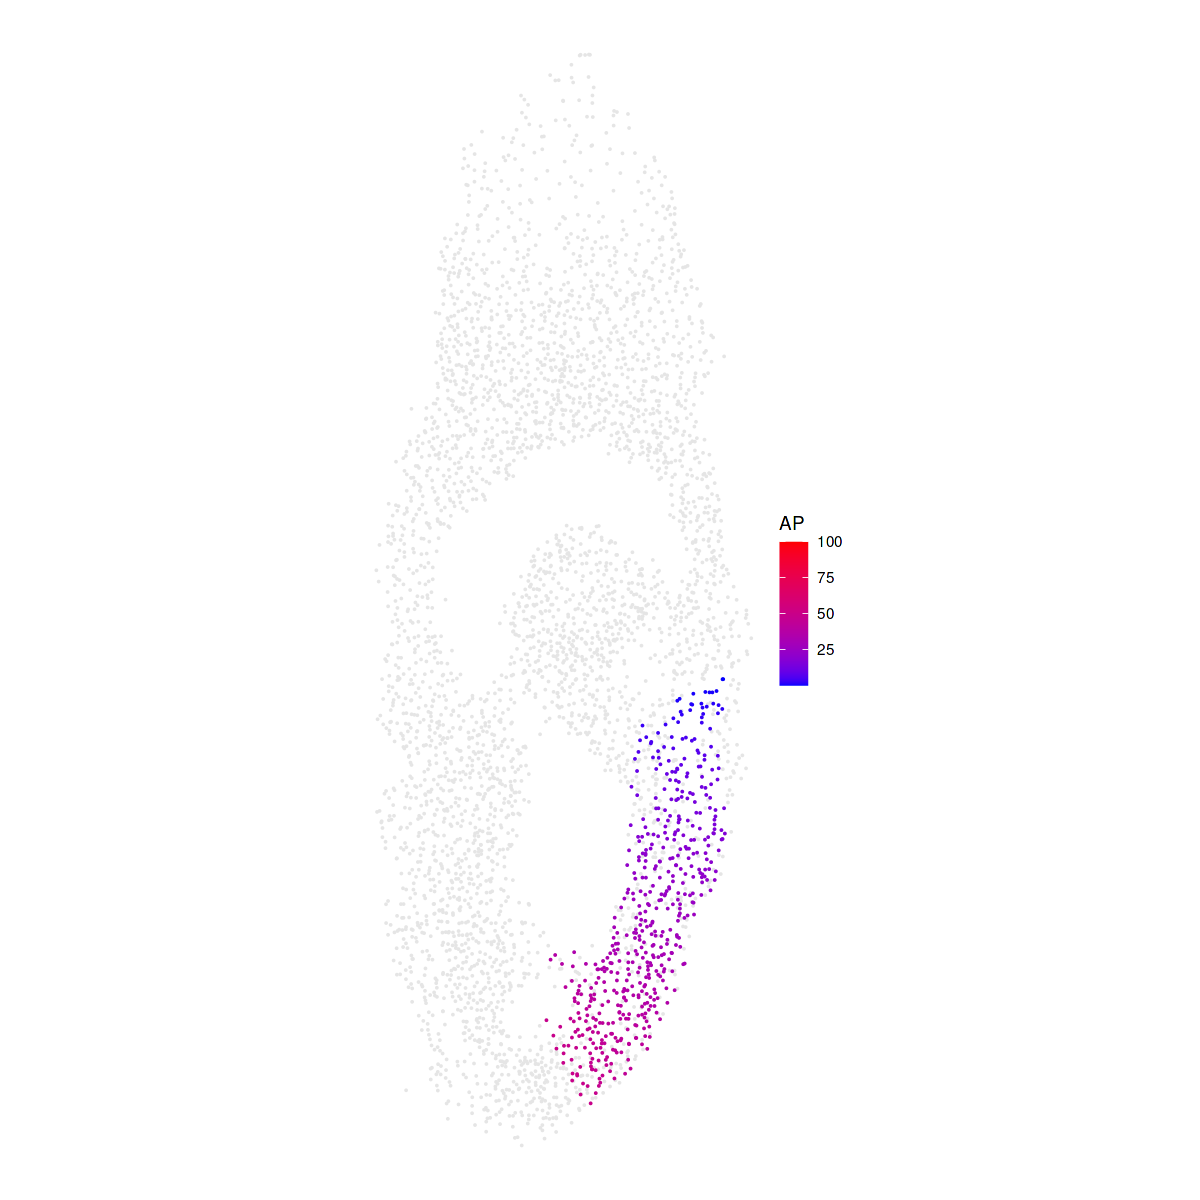

In [26]:
plot_AP_values <- function(seqFISH_postQC, seqFISH_preQC, 
                           cell_type_to_plot = "Epiblast", 
                           min_AP = 50, max_AP = 100, 
                           pt_size = 1, 
                           min_DV = 30, max_DV = 100, 
                           embryo_to_plot = "embryo_7",
                           output_dir = NULL,   # Add default value
                           file_name = "plot.pdf") {  # Add default value{
  
  # Extract meta.data
  seqFISH_postQC_meta <- seqFISH_postQC@meta.data
  seqFISH_preQC_meta <- seqFISH_preQC@meta.data
  
  options(repr.plot.width=10, repr.plot.height=10)
  
  # Calculate ranges
  AP_pos_max <- max(seqFISH_postQC_meta$AP, na.rm = TRUE)
  AP_pos_min <- min(seqFISH_postQC_meta$AP, na.rm = TRUE)
  
  DV_pos_max <- max(seqFISH_postQC_meta$DV, na.rm = TRUE)
  DV_pos_min <- min(seqFISH_postQC_meta$DV, na.rm = TRUE)
  
  dim2_max <- max(seqFISH_postQC_meta$dim2, na.rm = TRUE)
  dim2_min <- min(seqFISH_postQC_meta$dim2, na.rm = TRUE)
  
  ## Plot AP Values
  upper_bound <- AP_pos_max
  lower_bound <- AP_pos_min
  
  p1 <- ggplot(seqFISH_postQC_meta[seqFISH_postQC_meta$embryo == embryo_to_plot & 
                                    seqFISH_postQC_meta$refined_annotation %in% cell_type_to_plot & 
                                    seqFISH_postQC_meta$joint_clusters_pass_QC == TRUE &
                                    seqFISH_postQC_meta$AP >= min_AP & 
                                    seqFISH_postQC_meta$AP <= max_AP & 
                                    seqFISH_postQC_meta$DV >= min_DV & 
                                    seqFISH_postQC_meta$DV <= max_DV , ], aes(dim1, dim2, col=AP)) + 
    geom_point(data=seqFISH_preQC_meta[seqFISH_preQC_meta$embryo == embryo_to_plot, ], col='grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    scale_color_gradient(low = "blue", high = "red", limits = c(lower_bound, upper_bound)) + 
    theme_void() + 
    theme(legend.position='right') + 
    coord_fixed()
  
  print(p1)
    
  # Construct the full file path
  file_path <- file.path(output_dir, file_name)
  
  # Save the plot as a rasterized PDF using Cairo
  CairoPDF(file = file_path, width = 10, height = 10)
  print(p1)
  dev.off()
    
  # Construct the full file path
  file_path <- file.path(output_dir, file_name)
  
  # Save the plot as a rasterized PDF using Cairo
  CairoPDF(file = file_path, width = 4, height = 4)
  print(p1)
  dev.off()
}

# Example usage:
plot_AP_values(seqFISH_postQC, seqFISH_preQC,
               cell_type_to_plot = c("ExE endoderm", "Visceral endoderm", "Parietal endoderm", "Primitive Streak", "Nascent mesoderm"),
               min_AP = 0, max_AP = 50,
               pt_size = 0.01,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo7",
               output_dir = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output",  # Provide the correct directory path
               file_name = "AP_plot.pdf")

In [27]:
script_files <- list.files("projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/R_scripts", 
                           pattern = "\\.[rR]$", full.names = TRUE)

invisible(lapply(script_files, source))

Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


ERROR: Error in Cairo(width, height, file, "pdf", pointsize = pointsize, bg = bg, : Failed to create Cairo backend!


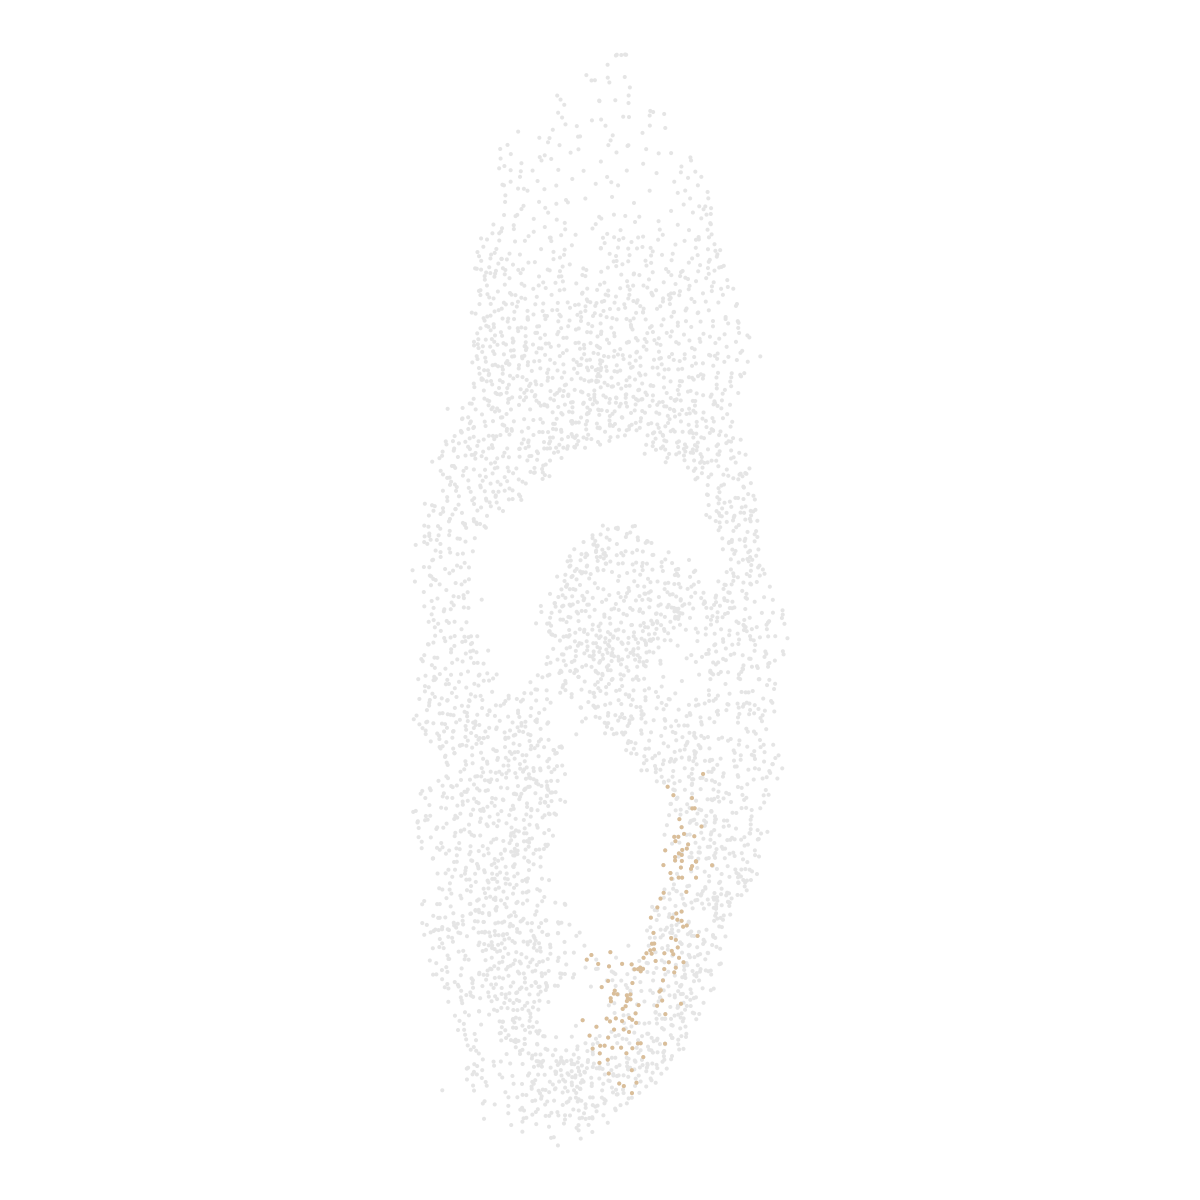

In [28]:
refined_annotation_colors <- Harland_colors

plot_refined_annotations <- function(seqFISH_postQC, seqFISH_preQC, 
                           cell_type_to_plot = "Epiblast", 
                           min_AP = 50, max_AP = 100, 
                           pt_size = 1, 
                           min_DV = 30, max_DV = 100, 
                           embryo_to_plot = "embryo7",
                           output_dir = NULL,   # Add default value
                           file_name = "plot.pdf") {  # Add default value
  
  # Check if output_dir is provided
  if (is.null(output_dir)) {
    stop("Error: 'output_dir' must be specified.")
  }
  
  # Extract meta.data
  seqFISH_postQC_meta <- seqFISH_postQC@meta.data
  seqFISH_preQC_meta <- seqFISH_preQC@meta.data
  
  # Set plot dimensions
  options(repr.plot.width = 10, repr.plot.height = 10)
  
  ## Plot AP Values
  p1 <- ggplot(seqFISH_postQC_meta[seqFISH_postQC_meta$embryo == embryo_to_plot & 
                                    seqFISH_postQC_meta$refined_annotation %in% cell_type_to_plot & 
                                    seqFISH_postQC_meta$joint_clusters_pass_QC == TRUE &
                                    seqFISH_postQC_meta$AP >= min_AP & 
                                    seqFISH_postQC_meta$AP <= max_AP & 
                                    seqFISH_postQC_meta$DV >= min_DV & 
                                    seqFISH_postQC_meta$DV <= max_DV, ], 
               aes(dim1, dim2, col = refined_annotation)) + 
    geom_point(data = seqFISH_preQC_meta[seqFISH_preQC_meta$embryo == embryo_to_plot, ], 
               col = 'grey90', size = pt_size) + 
    geom_point(size = pt_size) +
    scale_color_manual(values = refined_annotation_colors) + 
    theme_void() + 
    theme(legend.position = 'none') + 
    coord_fixed()
  
  print(p1)
  
  # Construct the full file path
  file_path <- file.path(output_dir, file_name)
  
  # Save the plot as a rasterized PDF using Cairo
  CairoPDF(file = file_path, width = 2, height = 2)
  print(p1)
  dev.off()
}

# Example usage:
plot_refined_annotations(seqFISH_postQC, seqFISH_preQC,
               cell_type_to_plot = c("Primitive Streak"),
               min_AP = 0, max_AP = 50,
               pt_size = 0.1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo7",
               output_dir = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output",  # Provide the correct directory path
               file_name = "primitive_streak_plot.pdf")

plot_refined_annotations(seqFISH_postQC, seqFISH_preQC,
               cell_type_to_plot = c("Nascent mesoderm"),
               min_AP = 0, max_AP = 50,
               pt_size = 0.1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo7",
               output_dir = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output",  # Provide the correct directory path
               file_name = "NM_plot.pdf")

plot_refined_annotations(seqFISH_postQC, seqFISH_preQC,
               cell_type_to_plot = c("ExE endoderm", "Visceral endoderm", "Parietal endoderm"),
               min_AP = 0, max_AP = 50,
               pt_size = 0.1,
               min_DV = 0, max_DV = 100,
               embryo_to_plot = "embryo7",
               output_dir = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output",  # Provide the correct directory path
               file_name = "endoderm_plot.pdf")


In [29]:
# Define your data filtering criteria
embryos_to_include <- c("embryo7")
cell_types_to_include <- c("Epiblast", "Nascent mesoderm", "Primitive Streak", "Anterior Primitive Streak", "Visceral endoderm", "Parietal endoderm", "ExE endoderm")

# Subset the data based on the filtering criteria
seqFISH_subset <- subset(seqFISH_postQC, 
                         subset = embryo %in% embryos_to_include &
                                  joint_clusters_pass_QC == TRUE &
                                  refined_annotation %in% cell_types_to_include)

# Define the specific column names you want to keep
selected_columns <- c("cell_ID", "refined_annotation", "AP")

# Subset the data frame to include only the selected columns
subsetted_sorted_meta <- seqFISH_subset@meta.data[selected_columns]

# Convert "extended_atlas_celltype_transfer" to factor with desired order
subsetted_sorted_meta$refined_annotation <- factor(subsetted_sorted_meta$refined_annotation, 
                                                                 levels = cell_types_to_include)

# Display the heatmap_plot
options(repr.plot.width=6, repr.plot.height=6)

# Plot using ggridges with transparent fill and pseudo-3D effect
p1 <- ggplot(subsetted_sorted_meta, aes(x = AP, y = refined_annotation, fill = refined_annotation)) +
  geom_density_ridges() +
  scale_fill_manual(values = alpha(Harland_colors)) +  # Apply alpha to colors
  theme_ridges() +
  theme(legend.position = "none") +  # Remove the legend
  labs(x = "", y = "") +  # Add axis labels
  theme(plot.title = element_text(hjust = 0.5),
       panel.grid.major.x = element_blank()) + 
  xlim(0, 100) +  # Set x-axis limits
  scale_x_reverse(breaks = seq(0, 100, by = 25)) + 
  #annotate("text", x = 100, y = 0, label = "Anterior", vjust = -1, hjust = 0.5) +  # Add label "Anterior" at x = 100
  #annotate("text", x = 0, y = 0, label = "Posterior", vjust = -1, hjust = 0.5) +   # Add label "Posterior" at x = 0 
  geom_vline(xintercept = c(0, 50), color = "black", linetype = "dashed")  # Add vertical grid lines at 0 and 60 in red

  # Construct the full file path

  output_dir = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output"
  file_name = "ridges_plot_AP.pdf"    
  file_path <- file.path(output_dir, file_name)

  # Save the plot as a rasterized PDF using Cairo
  CairoPDF(file = file_path, width = 4, height = 4)
  print(p1)
  dev.off()

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from shila_umap_ to shilaumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from stabmap_umap_ to stabmapumap_”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


ERROR: Error in Cairo(width, height, file, "pdf", pointsize = pointsize, bg = bg, : Failed to create Cairo backend!


## TRADESEQ PIPELINE

In [30]:
filter_seurat_object <- function(seurat_obj, embryos_to_include, celltype_to_include, min_AP, max_AP, min_DV, max_DV, X) {
  
  # Subset the Seurat object
  seurat_subset <- subset(seurat_obj, 
                          subset = embryo %in% embryos_to_include &
                                   refined_annotation %in% celltype_to_include &
                                   joint_clusters_pass_QC == TRUE &
                                   AP >= min_AP & AP <= max_AP &
                                   DV >= min_DV & DV <= max_DV)
  
  # Get the metadata including the "refined_annotation"
  metadata <- seurat_subset@meta.data
  
  # Count the number of cells in each "refined_annotation" group
  annotation_counts <- table(metadata$refined_annotation)
  
  # Filter for annotations with X or more cells
  valid_annotations <- names(annotation_counts[annotation_counts >= X])
  
  # Subset the Seurat object based on the valid annotations
  seurat_filtered <- subset(seurat_subset, subset = refined_annotation %in% valid_annotations)
  
  # Return the filtered Seurat object
  return(seurat_filtered)
}

# Example usage:
# Define parameters
embryos_to_include <- "embryo7"
celltype_to_include <- c("Primitive Streak", "Nascent mesoderm", "Parietal endoderm", "ExE endoderm", "Visceral endoderm")
min_AP <- 0
max_AP <- 50
min_DV <- 0 
max_DV <- 100
X <- 10 

# Call the function
seqFISH_filtered <- filter_seurat_object(seqFISH_postQC, embryos_to_include, celltype_to_include, min_AP, max_AP, min_DV, max_DV, X)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from shila_umap_ to shilaumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from stabmap_umap_ to stabmapumap_”


In [31]:
table(seqFISH_filtered@meta.data$refined_annotation)


     ExE endoderm  Nascent mesoderm  Primitive Streak Visceral endoderm 
               80               263               139                34 

In [32]:
# Assuming your data frame is called df
seqFISH_filtered@meta.data <- seqFISH_filtered@meta.data %>%
  mutate(refined_annotation = case_when(
    refined_annotation %in% c("ExE endoderm", "Visceral endoderm") ~ "Visceral endoderm",
    TRUE ~ refined_annotation  # Keep the remaining names unchanged
  ))

In [33]:
table(seqFISH_filtered@meta.data$refined_annotation)


 Nascent mesoderm  Primitive Streak Visceral endoderm 
              263               139               114 

In [34]:
## Find Variable Features to Restrict which Genes are Explored in TRADESEQ
DefaultAssay(seqFISH_filtered) <- "imputedcounts"
number_features <- 2000
seqFISH_filtered <- FindVariableFeatures(seqFISH_filtered, nfeatures = number_features, assay = "imputedcounts")
var_features <- VariableFeatures(seqFISH_filtered)

In [35]:
str(var_features)

 chr [1:2000] "Ttr" "Apoa1" "Rbp4" "Spink1" "Apom" "Fabp3" "Srgn" "S100g" ...


In [36]:
seqFISH_filtered

An object of class Seurat 
56393 features across 516 samples within 5 assays 
Active assay: imputedcounts (27670 features, 2000 variable features)
 4 other assays present: originalexp, within_timepoint_integration, across_timepoint_integration, imputed
 6 dimensional reductions calculated: pca, umap, spatial, Shila_PCA, Shila_UMAP, StabMAP_UMAP

### Generate matrices for fitGAM

In [37]:
generate_matrices <- function(seqFISH_filtered, AP_column) {
  
  # Generate the counts matrix
  counts <- seqFISH_filtered@assays$imputedcounts@counts
  
  #### Generate the pseudotime matrix ####
  pseudotime <- seqFISH_filtered@meta.data %>%
    select(all_of(AP_column), refined_annotation)
  
  # Get the unique cell types from the refined_annotation column
  unique_cell_types <- unique(pseudotime$refined_annotation)
  
  # Loop over each unique cell type to create a new column
  for (cell_type in unique_cell_types) {
    # Create a new column name based on the cell type
    new_column_name <- paste("lineage", cell_type, sep = "_")
    
    # Populate the new column with the AP values (same for all rows)
    pseudotime[[new_column_name]] <- pseudotime[[AP_column]]
  }
  
  # Remove the original AP and refined_annotation columns
  pseudotime <- pseudotime[, !(names(pseudotime) %in% c(AP_column, "refined_annotation"))]
  
  # Now pseudotime contains the AP values repeated in each new lineage column
  
  ### Generate the cell weights matrix ###
  
  # Get the unique cell types from the refined_annotation column
  unique_cell_types <- unique(seqFISH_filtered@meta.data$refined_annotation)
  
  # Initialize a matrix with dimensions: number of cells x number of unique cell types
  cell_weights <- matrix(0, nrow = nrow(seqFISH_filtered@meta.data), ncol = length(unique_cell_types))
  
  # Generate the column names with the same naming convention as in pseudotime
  colnames(cell_weights) <- paste("lineage", unique_cell_types, sep = "_")
  rownames(cell_weights) <- rownames(seqFISH_filtered@meta.data)
  
  # Populate the matrix with 1s where the cell belongs to the lineage
  for (i in 1:length(unique_cell_types)) {
    cell_weights[, i] <- ifelse(seqFISH_filtered@meta.data$refined_annotation == unique_cell_types[i], 1, 0)
  }
  
  # If there is only one unique cell type, set all values to 1
  if (length(unique_cell_types) == 1) {
    cell_weights <- matrix(1, nrow = nrow(seqFISH_filtered@meta.data), ncol = 1)
    colnames(cell_weights) <- paste("lineage", unique_cell_types, sep = "_")
    rownames(cell_weights) <- rownames(seqFISH_filtered@meta.data)
  }
  
  # Return the generated matrices as a list
  return(list(counts = counts, pseudotime = pseudotime, cell_weights = cell_weights))
}

# Example usage:
 result <- generate_matrices(seqFISH_filtered, "AP")
 counts <- result$counts
 pseudotime <- result$pseudotime
 cell_weights <- result$cell_weights

In [38]:
pseudotime_mx <- as.matrix(pseudotime)

In [39]:
identical(rownames(pseudotime), rownames(cell_weights))

[1] TRUE

In [40]:
head(pseudotime)

,lineage_Nascent mesoderm,lineage_Primitive Streak,lineage_Visceral endoderm
,<dbl>,<dbl>,<dbl>
embryo7_Pos12_cell3,26.48064,26.48064,26.48064
embryo7_Pos12_cell109,30.12528,30.12528,30.12528
embryo7_Pos12_cell139,27.56264,27.56264,27.56264
embryo7_Pos12_cell171,37.07289,37.07289,37.07289
embryo7_Pos12_cell364,36.78815,36.78815,36.78815
embryo7_Pos12_cell385,34.28246,34.28246,34.28246


In [41]:
head(cell_weights)

,lineage_Nascent mesoderm,lineage_Primitive Streak,lineage_Visceral endoderm
embryo7_Pos12_cell3,1,0,0
embryo7_Pos12_cell109,0,1,0
embryo7_Pos12_cell139,0,1,0
embryo7_Pos12_cell171,0,1,0
embryo7_Pos12_cell364,0,1,0
embryo7_Pos12_cell385,0,1,0


### Run FITGAM

In [39]:
# Fit GAM model
sce_GAM <- fitGAM(counts = counts, 
                  pseudotime = pseudotime_mx, 
                  cellWeights = cell_weights,
                  genes = var_features,
                  nknots = 6, 
                  verbose = TRUE)

# Save sce_GAM to a specific file location
saveRDS(sce_GAM, file = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/sce_GAM_AP_embryo7_mx.rds")

# Within lineage comparisons, test for all lineages independently
assoRes <- associationTest(sce_GAM, lineages = TRUE)

# Save assoRes to a specific file location
saveRDS(assoRes, file = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/assoRes_AP_embryo7_mx.rds")

In [40]:
write.csv(assoRes,
          file = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/assoRes_AP_embryo7_mx.csv",
          row.names = TRUE)

### Identify genes changing along the axes in each cell type

In [41]:
# Filter the assoRes data frame to keep only rows with pvalue < 0.05
# Filter using dplyr to keep only rows with pvalue_1 < 0.05 or pvalue_2 < 0.05
assoRes_filtered_1 <- assoRes %>% 
  filter(pvalue_1 < 0.05 & meanLogFC >= log2(1.3))

assoRes_filtered_2 <- assoRes %>% 
  filter(pvalue_2 < 0.05 & meanLogFC >= log2(1.3))

assoRes_filtered_3 <- assoRes %>% 
  filter(pvalue_3 < 0.05 & meanLogFC >= log2(1.3))

lin1_genes <- rownames(assoRes_filtered_1)
lin2_genes <- rownames(assoRes_filtered_2)
lin3_genes <- rownames(assoRes_filtered_3)

In [42]:
tail(assoRes_filtered_1)

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,waldStat_3,df_3,pvalue_3,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gata3,NA,NA,NA,19.68619,5,0.001430997,0.01739629,6,0.9999999,1.612115,5,0.89978037,1.3605634
9130008F23Rik,NA,NA,NA,17.56936,5,0.003537475,1.15414443,6,0.9790891,NA,NA,NA,0.6917245
Dapk2,NA,NA,NA,12.60072,5,0.027421997,NA,NA,NA,10.531585,5,0.06150023,0.7380568
Tagln3,NA,NA,NA,15.81999,5,0.007377259,NA,NA,NA,NA,NA,NA,0.9964548
Rgs3,NA,NA,NA,14.68130,5,0.011814521,NA,NA,NA,3.960236,5,0.55515505,1.3446815
Gna14,NA,NA,NA,12.08403,5,0.033654276,5.92926327,6,0.4311606,NA,NA,NA,0.6261632


In [43]:
# extracting fitted values 
ysmooth_lin1 <- predictSmooth(models = sce_GAM, gene = unique(lin1_genes), nPoints = 100, tidy = FALSE)
ysmooth_lin2 <- predictSmooth(models = sce_GAM, gene = unique(lin2_genes), nPoints = 100, tidy = FALSE)
ysmooth_lin3 <- predictSmooth(models = sce_GAM, gene = unique(lin3_genes), nPoints = 100, tidy = FALSE)

ysmooth <- predictSmooth(models = sce_GAM, gene = unique(c(lin1_genes,lin2_genes, lin3_genes)), nPoints = 100, tidy = FALSE)

In [44]:
tail(ysmooth)

,lineage1_1,lineage1_2,lineage1_3,lineage1_4,lineage1_5,lineage1_6,lineage1_7,lineage1_8,lineage1_9,lineage1_10,...,lineage3_91,lineage3_92,lineage3_93,lineage3_94,lineage3_95,lineage3_96,lineage3_97,lineage3_98,lineage3_99,lineage3_100
Cald1,3.83603093,3.79937440,3.7631095,3.7272482,3.6918019,3.6567813,3.6221967,3.5880578,3.5543739,3.5211537,...,4.565604561,4.659489747,4.754633799,4.851120934,4.949041708,5.048493251,5.149579523,5.252411584,5.357107894,5.463794629
Scly,0.80477602,0.81568285,0.8267160,0.8378678,0.8491302,0.8604946,0.8719520,0.8834929,0.8951070,0.9067840,...,1.397194863,1.382387877,1.367909663,1.353731899,1.339827327,1.326169706,1.312733769,1.299495180,1.286430506,1.273517179
Gatsl2,0.09777375,0.09972246,0.1017053,0.1037209,0.1057675,0.1078436,0.1099472,0.1120762,0.1142284,0.1164015,...,0.006277483,0.005587665,0.004973373,0.004426399,0.003939418,0.003505891,0.003119986,0.002776501,0.002470797,0.002198737
Timp2,0.80020784,0.78796651,0.7759448,0.7641512,0.7525935,0.7412788,0.7302135,0.7194037,0.7088548,0.6985716,...,2.298821751,2.383725670,2.471827880,2.563243028,2.658089355,2.756488776,2.858566959,2.964453395,3.074281482,3.188188590
Dusp23,0.43919196,0.41741039,0.3967838,0.3772761,0.3588494,0.3414645,0.3250814,0.3096597,0.2951591,0.2815396,...,0.704108791,0.737025756,0.771714414,0.808249096,0.846705011,0.887157929,0.929683817,0.974358432,1.021256859,1.070453007
Wasf1,2.48209009,2.47320274,2.4643382,2.4554929,2.4466632,2.4378457,2.4290368,2.4202331,2.4114313,2.4026281,...,1.043805118,1.064200629,1.084978187,1.106146714,1.127715408,1.149693761,1.172091558,1.194918895,1.218186187,1.241904180


### Generate Heatmap

In [45]:
cluster_colors <- c(
  "1" = "#E41A1C",  # Red
  "2" = "#377EB8",  # Blue
  "3" = "#4DAF4A",  # Green
  "4" = "#984EA3",  # Purple
  "5" = "#FF7F00",  # Orange
  "6" = "#FFFF33",  # Yellow
  "7" = "#A65628",  # Brown
  "8" = "#F781BF",  # Pink
  "9" = "#999999",  # Grey
  "10" = "#66C2A5", # Teal
  "11" = "#FC8D62", # Coral
  "12" = "#8DA0CB", # Soft Blue
  "13" = "#A6D854", # Light Green
  "14" = "#FFD92F", # Bright Yellow
  "15" = "#E78AC3", # Magenta
  "16" = "#C44E52", # Dark Red
  "17" = "#44AA99", # Turquoise
  "18" = "#DDCC77", # Sand
  "19" = "#882255", # Deep Purple
  "20" = "#117733"  # Deep Green
)

In [46]:
# Scale each row
ysmooth_scaled <- t(apply(ysmooth, 1, scale))

In [47]:
str(ysmooth_scaled)

 num [1:267, 1:300] -0.391 -0.594 -0.534 5.596 -0.569 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:267] "Sparc" "Afp" "H19" "Etv2" ...
  ..$ : NULL


$`1`
 [1] "Sparc"         "Gadd45g"       "Cyr61"         "Dusp9"        
 [5] "Gjb3"          "Gpx2"          "Gata4"         "Pitx2"        
 [9] "Jund"          "Flrt3"         "Junb"          "3830403N18Rik"
[13] "Tead1"         "Tnfrsf21"      "Fabp3"         "Pth1r"        
[17] "Aqp8"          "Lamc1"         "Col4a2"        "Pitx1"        
[21] "Lamb1"         "Klf4"          "Gata6"         "Anxa5"        
[25] "Zfp42"         "Mfge8"         "Glipr2"        "Foxq1"        
[29] "Cmtm7"         "Glipr1"        "Ascl2"         "Pdgfra"       
[33] "Lpar3"         "Rffl"          "Timp2"        

$`2`
 [1] "Afp"           "H19"           "Slc2a3"        "Podxl"        
 [5] "Peg10"         "Tnfrsf12a"     "Dlk1"          "Amot"         
 [9] "Sdc4"          "Pxdc1"         "Mpc2"          "Pcgf5"        
[13] "Phlda1"        "Pdzk1"         "Lrp2"          "Mfsd12"       
[17] "Polg"          "Sgce"          "Sh3bp5"        "Synj1"        
[21] "Zc3hav1"       "Ctsh"          "Mt2"           "Npl"          
[25] "Cubn"          "Spp2"          "Slc13a4"       "Apoc1"        
[29] "Smlr1"         "Dpp4"          "Neu1"          "Tmprss2"      
[33] "Depdc7"        "Hebp1"         "Sec14l2"       "2810459M11Rik"
[37] "Sigirr"        "Dnajc22"       "Tfec"          "Vil1"         
[41] "Slc40a1"       "Mttp"          "Apoc2"         "Leap2"        
[45] "Klhl2"         "1700011H14Rik" "Gldc"          "Tm4sf5"       
[49] "Sft2d2"        "Stard4"        "Acox1"         "Tpcn1"        
[53] "Bend7"         "Inpp5f"        "Kitl"          "Dusp23"       

$`3`
 [1] "Etv2"    "Phlda2"  "Hand1"   "Mest"    "Pmp22"   "Foxf1"   "Spin2c" 
 [8] "Msx2"    "Bmp4"    "Kdr"     "Ppic"    "Tacstd2" "Dusp2"   "Gata2"  
[15] "Pcsk5"   "Isl1"    "Spats2l" "Gfpt2"   "Abi3"    "Dok4"    "Gata3"  

$`4`
 [1] "Lefty2"  "Mesp1"   "Lhx1"    "Hoxb1"   "Mesp2"   "Hes7"    "Dll3"   
 [8] "Fam212a" "Arl4d"   "Snai1"   "Tbx6"    "Dll1"    "Irx5"    "Chst7"  
[15] "Irx3"    "Foxc1"   "Epha4"  

$`5`
[1] "Hba-x"  "Krt18"  "Lrpap1" "Krt8"   "Cdkn1c" "Fdx1l"  "Ggta1" 

$`6`
[1] "Trh"     "Fgf5"    "Arl4c"   "Ppp1r1a" "Epha2"   "Map1b"   "Wnt8a"  
[8] "Jakmip1"

$`7`
 [1] "Lmo1"       "Wnt2"       "Bambi"      "Rspo3"      "Klhl6"     
 [6] "Hmga2"      "Asb4"       "Efna1"      "Tgfb1"      "Exoc3l"    
[11] "Slc38a4"    "St6galnac4" "Slc6a6"     "Rgs5"       "Aard"      
[16] "Cabp1"      "Col9a1"     "Fgf3"      

$`8`
 [1] "T"       "Mixl1"   "Sp5"     "Fgf15"   "Gas1"    "Frzb"    "Pmaip1" 
 [8] "Lef1"    "Dusp6"   "Sox4"    "Nnat"    "Fgf4"    "Pcdh8"   "Zic3"   
[15] "Rxrg"    "Zfp36l2" "Dact1"   "Gna14"  

$`9`
 [1] "Pim2"          "Nefl"          "Fgf8"          "Dnmt3b"       
 [5] "Pou5f1"        "Ldhb"          "Apln"          "Cxx1b"        
 [9] "Psors1c2"      "Snrpn"         "Nanog"         "Bcat1"        
[13] "Prps1"         "Gng3"          "Epha1"         "Ina"          
[17] "1700013H16Rik" "Rab25"         "Crmp1"         "Btla"         
[21] "Zic5"          "Msantd3"       "Coro1a"        "Prickle1"     
[25] "9130008F23Rik" "Tagln3"        "Gsc"           "Wasf1"        

$`10`
[1] "Fst"    "Otx2"   "Tubb3"  "Dhrs7"  "Dapk2"  "Shisa2"

$`11`
 [1] "Msx1"   "Id1"    "Tbx3"   "Cfc1"   "Id3"    "Tnni1"  "Usp51"  "Igfbp4"
 [9] "Prdm6"  "Smad7"  "Nexn"   "Rgs3"   "Crabp1"

$`12`
[1] "Cyp26a1" "Maged1"  "Cnn2"    "Cald1"  

$`13`
[1] "Plet1"   "S100a10" "Lrrn4"   "Klf6"    "Pvrl2"   "Nrp1"    "Bmp2"   
[8] "P3h2"    "Gyg"    

$`14`
 [1] "Ccnd2"    "Igfbp3"   "Evx1"     "Ifitm3"   "Ccnd1"    "Ckb"     
 [7] "Vstm2b"   "Tmem88"   "Cdc42ep5" "Basp1"    "Phlda3"  

$`15`
[1] "Plac1"  "Mum1l1" "Stard8" "Pwwp2b" "Aldh2"  "Pard6b"

$`16`
[1] "Rbp1" "Sgk1"

$`17`
[1] "Chchd10" "Fam213a" "Tspan13" "Scly"    "Gatsl2" 

$`18`
[1] "Fam43a"

$`19`
[1] "Mpv17l"

$`20`
[1] "Lgals1"

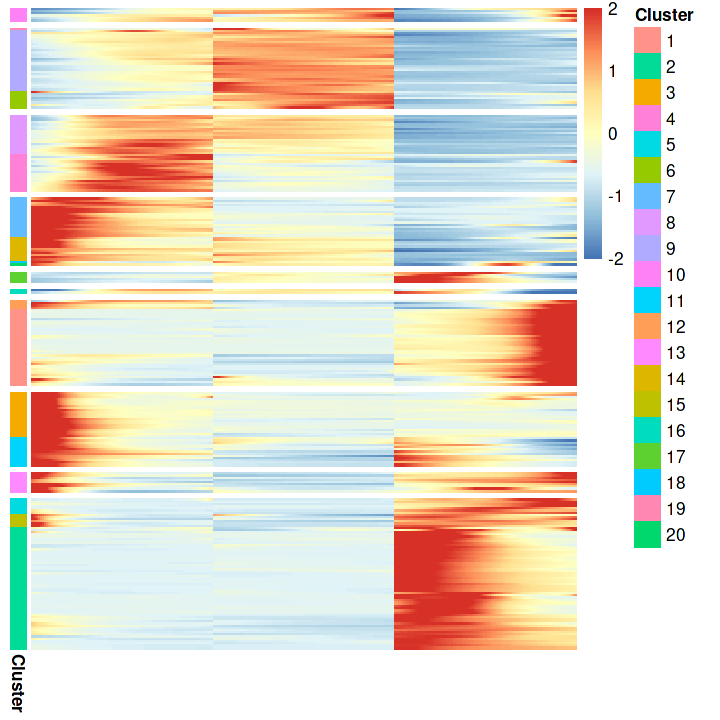

In [48]:
clusters <- 20

# Assuming `data_matrix` is your original data matrix
# Scale each row
scaled_data <- t(apply(ysmooth, 1, scale))

# Step 2: Perform hierarchical clustering on the scaled data
row_hclust <- hclust(dist(scaled_data))

# Step 3: Cut the tree into clusters (let's say 3 clusters)
cutree_result <- cutree(row_hclust, k = clusters)

# Step 4: Create a data frame for the row annotations (cluster numbers)
row_annotation <- data.frame(Cluster = factor(cutree_result))
rownames(row_annotation) <- rownames(scaled_data)

# Step 4: Retrieve row names for each cluster
clusters <- split(rownames(scaled_data), cutree_result)

# Optional: Display the row names for each cluster
clusters

# Create the heatmap using pheatmap with marker genes on the x-axis and cell types on the y-axis
heatmap_plot <- pheatmap(scaled_data,
                         #scale = "row",
                         cluster_rows = row_hclust,  
                         cluster_cols = FALSE,  
                         #color = viridis(100),
                         border_color = NA,
                         display_numbers = FALSE,
                         breaks = seq(-2, 2, length.out = 101),
                         show_colnames = FALSE,
                         show_rownames = FALSE,
                         #annotation_col=subsetted_sorted_meta,
                         #annotation_colors = my_colour,
                         use_raster = TRUE,
                         fontsize_row = 3,
                         cutree_rows = 10,
                         #cutree_cols = 3,
                         annotation_row = row_annotation,
                         #legend = TRUE,
                         treeheight_row = 0
                         #legend_labels = NULL
                        )

# Display the heatmap_plot
wi <- 10
he <- 10

options(repr.plot.width=wi, repr.plot.height=he)
#heatmap_plot 

# set the output directory
output_dir = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output"

# set the filename
    file_name <- paste0("tradeseq_AP","heatmap","embryo7_mx",
                       ".pdf")

# Save the grid plot as .svg file to specific file path
 ggsave(filename = file.path(output_dir, file_name), plot = heatmap_plot, device = "pdf",
      width = wi,
      height = he)

In [49]:
head(ysmooth_scaled)

Sparc,-0.3910366,-0.3973694,-0.4034947,-0.4094127,-0.4151240,-0.4206298,-0.4259317,-0.4310317,-0.4359323,-0.4406362,...,3.15738483,3.30921593,3.46656016,3.62967078,3.79881817,3.97429105,4.15639783,4.34546801,4.54185377,4.74593156
Afp,-0.5941246,-0.5948407,-0.5955252,-0.5961784,-0.5968007,-0.5973926,-0.5979546,-0.5984875,-0.5989918,-0.5994684,...,-0.01233650,-0.01923524,-0.02569935,-0.03178531,-0.03754702,-0.04303601,-0.04830174,-0.05339178,-0.05835198,-0.06322656
H19,-0.5340150,-0.5376372,-0.5411800,-0.5446439,-0.5480293,-0.5513371,-0.5545679,-0.5577223,-0.5608013,-0.5638057,...,0.40047674,0.38546406,0.37067299,0.35609784,0.34173307,0.32757332,0.31361340,0.29984827,0.28627308,0.27288309
Etv2,5.5955346,5.2150454,4.8585102,4.5246760,4.2123206,3.9202571,3.6473380,3.3924574,3.1545530,2.9326084,...,-0.61531515,-0.62514733,-0.63276673,-0.63863387,-0.64312590,-0.64654759,-0.64914226,-0.65110213,-0.65257761,-0.65368535
Lefty2,-0.5687432,-0.5550759,-0.5399146,-0.5231165,-0.5045295,-0.4839925,-0.4613360,-0.4363826,-0.4089482,-0.3788434,...,-0.67758795,-0.67793707,-0.67828228,-0.67862274,-0.67895770,-0.67928650,-0.67960853,-0.67992329,-0.68023030,-0.68052918
Slc2a3,-0.1352409,-0.1735539,-0.2096770,-0.2437089,-0.2757470,-0.3058874,-0.3342239,-0.3608478,-0.3858479,-0.4093101,...,-0.02064897,-0.02787663,-0.03453650,-0.04070412,-0.04645211,-0.05185051,-0.05696715,-0.06186788,-0.06661679,-0.07127636


In [50]:
## save the genes in each cluster as a CSV for https://metascape.org/gp/index.html#/main/step1

# Step 1: Find the maximum length of the gene lists
max_length <- max(sapply(clusters, length))

# Step 2: Pad shorter lists with NA to match the maximum length
clusters_padded <- lapply(clusters, function(x) {
  c(x, rep(NA, max_length - length(x)))
})

# Step 3: Convert the list to a data.table
cluster_dt <- as.data.table(clusters_padded)

# Step 4: Set the output directory and file name
output_dir <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output"
file_name <- "clusters_table_mx.csv"

# Step 5: Write the data.table to a CSV file
fwrite(cluster_dt, file = file.path(output_dir, file_name), na = "", quote = FALSE)

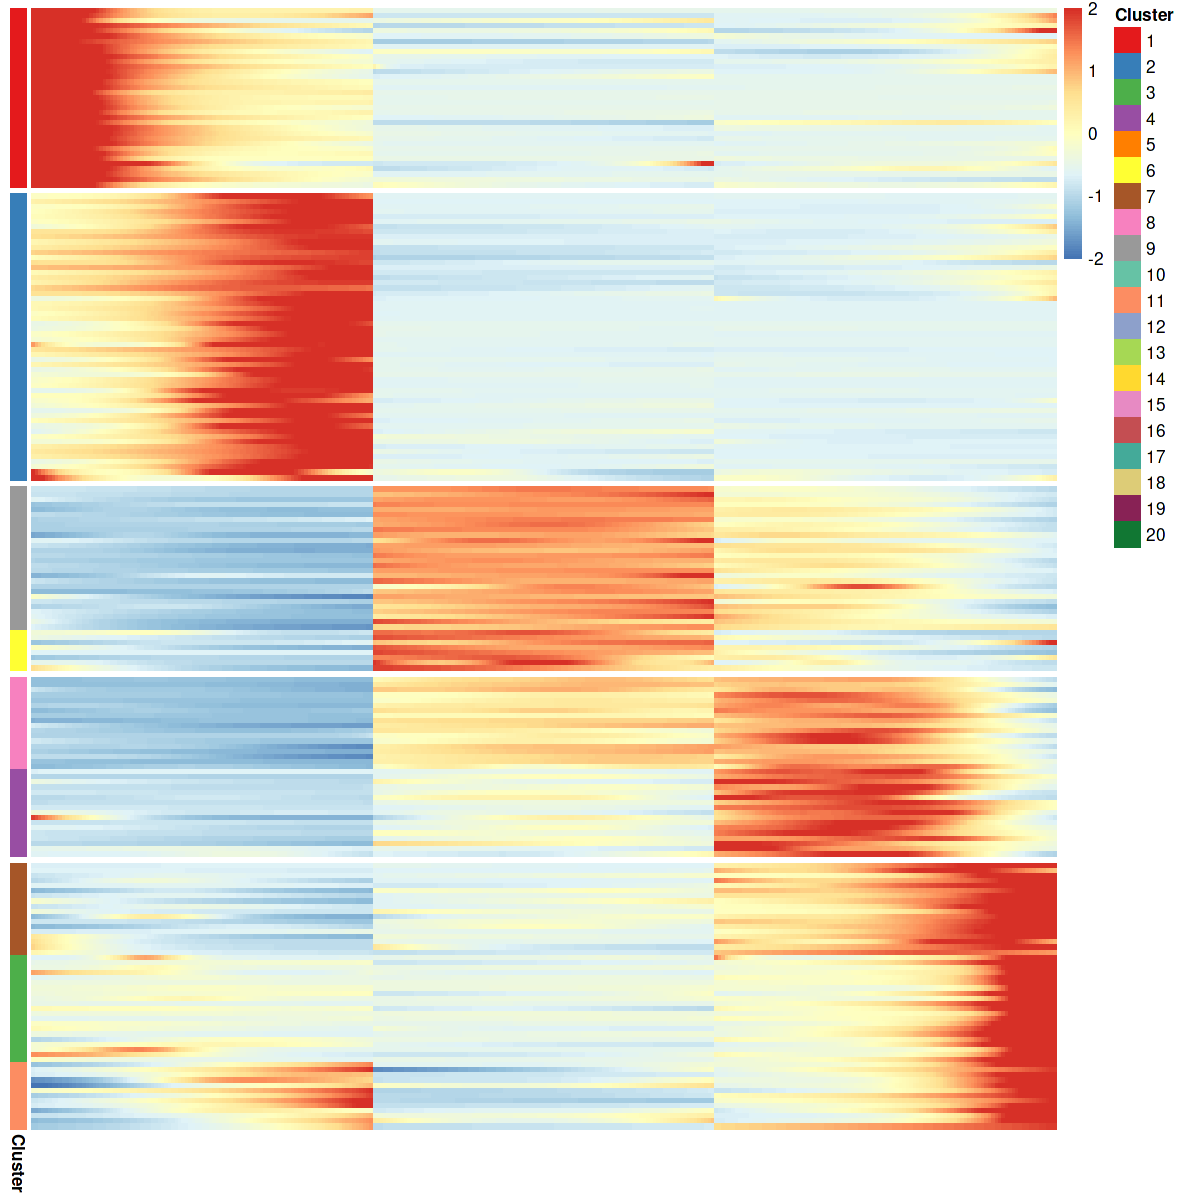

In [51]:
# Load required libraries
library(ggplot2)
library(pheatmap)  # For heatmap plotting
library(dplyr)

# Step 1: Scale each row
scaled_data <- t(apply(ysmooth, 1, scale))

# Step 2: Perform hierarchical clustering on the scaled data
row_hclust <- hclust(dist(scaled_data))

# Step 3: Define the number of clusters
num_clusters <- 20  # Adjust as needed

# Step 4: Cut the tree into clusters
cutree_result <- cutree(row_hclust, k = num_clusters)

# Step 5: Create a data frame for the row annotations (cluster numbers)
row_annotation <- data.frame(Cluster = factor(cutree_result))
rownames(row_annotation) <- rownames(scaled_data)

# Step 6: Define a color mapping for clusters (Ensuring distinct colors)
cluster_colors <- c(
  "1" = "#E41A1C",  # Red
  "2" = "#377EB8",  # Blue
  "3" = "#4DAF4A",  # Green
  "4" = "#984EA3",  # Purple
  "5" = "#FF7F00",  # Orange
  "6" = "#FFFF33",  # Yellow
  "7" = "#A65628",  # Brown
  "8" = "#F781BF",  # Pink
  "9" = "#999999",  # Grey
  "10" = "#66C2A5", # Teal
  "11" = "#FC8D62", # Coral
  "12" = "#8DA0CB", # Soft Blue
  "13" = "#A6D854", # Light Green
  "14" = "#FFD92F", # Bright Yellow
  "15" = "#E78AC3", # Magenta
  "16" = "#C44E52", # Dark Red
  "17" = "#44AA99", # Turquoise
  "18" = "#DDCC77", # Sand
  "19" = "#882255", # Deep Purple
  "20" = "#117733"  # Deep Green
)

# Step 7: Map cluster colors to row annotations
annotation_colors <- list(Cluster = cluster_colors)

# Step 8: Retrieve row names for each cluster
cluster_list <- split(rownames(scaled_data), cutree_result)

# Step 9: Specify the custom order of clusters
custom_order <- c(1, 2, 9, 6, 8, 4, 7, 3, 11)  # Adjust as needed

# Step 10: Reorder rows based on custom cluster order
ordered_clusters <- unlist(lapply(custom_order, function(cl) {
  which(cutree_result == cl)
}))

# Step 11: Reorder scaled_data and row_annotation
scaled_data <- scaled_data[ordered_clusters, ]
row_annotation <- row_annotation[ordered_clusters, , drop = FALSE]

# Step 12: Flip the columns of scaled_data (reverse order)
scaled_data <- scaled_data[, ncol(scaled_data):1]

# Step 13: Define custom row gaps
split_clusters <- c(1, 2, 6, 4)  # Clusters after which to insert gaps
gap_positions <- cumsum(table(factor(cutree_result[ordered_clusters], levels = custom_order)))
gap_positions <- gap_positions[which(names(gap_positions) %in% split_clusters)]

# Step 14: Create the heatmap using pheatmap
heatmap_plot <- pheatmap(
  scaled_data,
  cluster_rows = FALSE,  # Turn off clustering (rows already ordered)
  cluster_cols = FALSE,
  border_color = NA,
  display_numbers = FALSE,
  breaks = seq(-2, 2, length.out = 101),
  show_colnames = FALSE,
  show_rownames = FALSE,
  annotation_row = row_annotation,
  annotation_colors = annotation_colors,  # Apply cluster colors
  use_raster = TRUE,
  fontsize_row = 3,
  cutree_rows = NULL,
  treeheight_row = 0,
  gaps_row = gap_positions  # Add gaps between specified clusters
)

# Step 12: **Ensure only filtered data is saved**
output_dir <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output"
file_name <- paste0("tradeseq_AP_heatmap_ordered_embryo7_mx", ".pdf")

# Save the grid plot as .svg file to specific file path
 ggsave(filename = file.path(output_dir, file_name), plot = heatmap_plot, device = "pdf",
      width = wi,
      height = he)

In [52]:
# Filter only clusters used in the heatmap
used_clusters <- unique(cutree_result[ordered_clusters])
cluster_list_filtered <- cluster_list[as.character(used_clusters)]

# Print genes in each selected cluster in custom order
for (cl in custom_order) {
  if (as.character(cl) %in% names(cluster_list_filtered)) {
    cat("\nCluster", cl, "genes:\n")
    print(cluster_list_filtered[[as.character(cl)]])
  }
}


Cluster 1 genes:
 [1] "Sparc"         "Gadd45g"       "Cyr61"         "Dusp9"        
 [5] "Gjb3"          "Gpx2"          "Gata4"         "Pitx2"        
 [9] "Jund"          "Flrt3"         "Junb"          "3830403N18Rik"
[13] "Tead1"         "Tnfrsf21"      "Fabp3"         "Pth1r"        
[17] "Aqp8"          "Lamc1"         "Col4a2"        "Pitx1"        
[21] "Lamb1"         "Klf4"          "Gata6"         "Anxa5"        
[25] "Zfp42"         "Mfge8"         "Glipr2"        "Foxq1"        
[29] "Cmtm7"         "Glipr1"        "Ascl2"         "Pdgfra"       
[33] "Lpar3"         "Rffl"          "Timp2"        

Cluster 2 genes:
 [1] "Afp"           "H19"           "Slc2a3"        "Podxl"        
 [5] "Peg10"         "Tnfrsf12a"     "Dlk1"          "Amot"         
 [9] "Sdc4"          "Pxdc1"         "Mpc2"          "Pcgf5"        
[13] "Phlda1"        "Pdzk1"         "Lrp2"          "Mfsd12"       
[17] "Polg"          "Sgce"          "Sh3bp5"        "Synj1"        
[21] "Zc3hav1"

In [53]:
# Step 1: Define your custom cluster groupings
custom_cluster_map <- list(
  "Anterior END"     = c("1"),
  "Posterior END"    = c("2"),
  "Primitive Streak" = c("9", "6"),
  "Anterior NM"      = c("8", "4"),
  "Posterior NM"     = c("7", "3", "11")
)

# Step 2: Combine genes per group
named_cluster_genes <- lapply(custom_cluster_map, function(cluster_ids) {
  genes <- unlist(cluster_list[cluster_ids], use.names = FALSE)
  unique(genes)  # Optional: remove duplicates
})

# Step 3: Pad gene vectors to the same length
max_length <- max(sapply(named_cluster_genes, length))
padded_genes <- lapply(named_cluster_genes, function(gene_vec) {
  length(gene_vec) <- max_length  # pads with NA
  gene_vec
})

# Step 4: Convert to data frame
cluster_df <- data.frame(padded_genes, check.names = FALSE, stringsAsFactors = FALSE)

# Step 5: Replace NA with empty strings
cluster_df[is.na(cluster_df)] <- ""

# Step 6: Save to CSV
output_path <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/cluster_gene_lists_named_metascape.csv"
write.csv(cluster_df, output_path, row.names = FALSE, quote = TRUE)

cat("✅ Saved gene list to CSV with blank cells for missing entries:\n", output_path, "\n")

✅ Saved gene list to CSV with blank cells for missing entries:
 projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/cluster_gene_lists_named_metascape.csv 


In [54]:
# Step 13: Output the final row order
final_row_order <- rownames(scaled_data)

In [55]:
str(final_row_order)

 chr [1:214] "Sparc" "Gadd45g" "Cyr61" "Dusp9" "Gjb3" "Gpx2" "Gata4" ...


In [56]:
# Set the output directory and file name
#output_dir <- "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq/tradeseq_1/"
#file_name <- "clusters_table.csv"

# Write the data frame to a CSV file
#write.csv(cluster_dt, file = file.path(output_dir, file_name), row.names = FALSE)

## Plot the Same Heatmap Using GEO_SEQ DATASET

In [57]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(tibble)
library(viridis) # For the green-yellow-red color palette
library(readxl)
library(data.table)
library(pheatmap)     # For generating heatmaps


Attaching package: ‘tibble’


The following object is masked from ‘package:igraph’:

    as_data_frame




In [58]:
## Load in the seqFISH UMAP coordinates
io$E7.25_1_FPKM_Filter_Log2 = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GEO_SEQ_DATA/GSE171588_E7.25_1_FPKM_Filter_Log2.txt")

df <- read.delim(io$E7.25_1_FPKM_Filter_Log2)

In [59]:
# Clean column names: remove leading X and everything after the first .
colnames(df) <- gsub(".*_(.*)$", "\\1", colnames(df))

# set unique rownames
rownames(df) <-  make.unique(df$Gene)

#remove the Gene column as it is a character column
df$Genes <- NULL

# Log2-normalize the FPKM data with a pseudocount of 1
df_log2 <- df

# Convert the data frame into a long format
df_long <- df_log2 %>%
  as.data.frame() %>%
  rownames_to_column(var = "Gene") %>%
  pivot_longer(
    cols = -Gene,
    names_to = "Location",
    values_to = "Expression"
  )

# Extract row and column information
df_long <- df_long %>%
  mutate(
    Row = as.numeric(gsub("[^0-9]", "", Location)),   # Extract row number
    Column = gsub("[0-9]", "", Location)             # Extract column name
  )

# Define row order explicitly (11 to 1) and column order
df_long <- df_long %>%
  mutate(
    Row = factor(Row, levels = 11:1),  # Force rows from 11 (top) to 1 (bottom)
    Column = factor(Column, levels = c("EA", "A", "L", "R", "P", "M", "EP")) # Column order
  )

In [76]:
tail(df_log2)

,1AP,2A,2P,2L,2R,3A,3P,3L,3R,4A,...,10MA,10MP,10EP,11EA,11MA,11MP,11EP,12MA,12MP,12EP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zxdc,1.61,2.35,3.17,2.34,2.61,0.97,2.09,1.86,0.81,0.07,...,2.52,1.00,2.64,1.67,1.93,0.95,3.41,2.04,1.58,3.00
Zyg11a,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.27,1.47,0.00,0.00,0.00,0.40,0.00,0.08,0.00
Zyg11b,2.91,2.37,2.28,2.46,3.42,2.64,2.55,2.49,2.72,2.52,...,3.63,2.47,2.64,3.20,2.78,3.12,1.97,2.43,2.37,1.93
Zyx,5.69,5.24,7.91,6.22,5.47,4.78,6.30,5.77,5.24,5.74,...,5.22,5.76,5.35,5.32,5.31,5.51,5.09,5.66,6.26,5.13
Zzef1,1.81,1.45,2.27,1.65,0.96,1.50,1.47,1.15,1.55,0.85,...,1.21,1.17,2.15,1.42,1.32,0.88,2.60,1.84,2.18,2.15
Zzz3,3.50,3.63,3.52,3.55,3.55,3.47,3.54,3.52,4.24,3.44,...,3.58,4.01,4.27,3.89,3.65,3.53,3.75,3.79,3.27,3.71


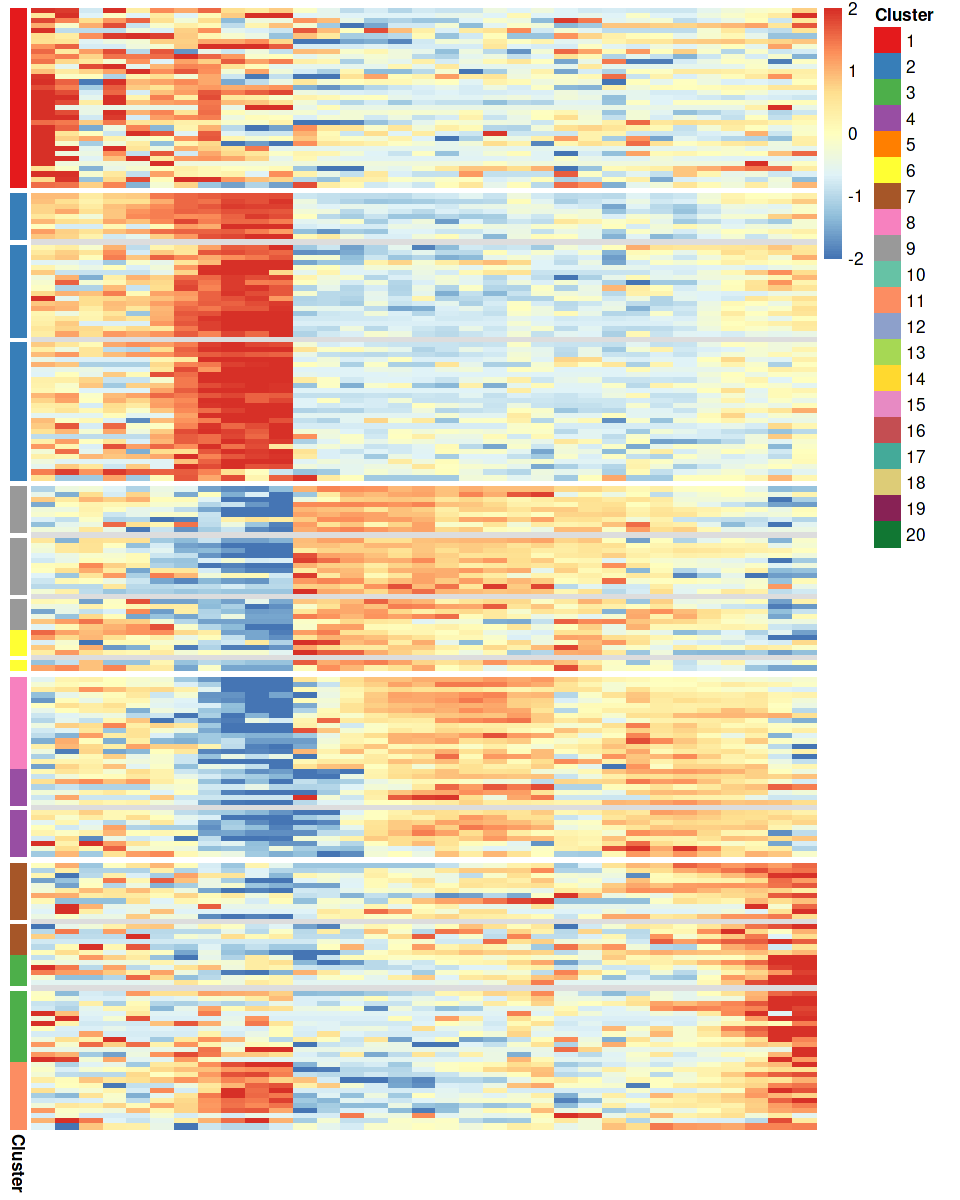

In [61]:
ordered_genes <- final_row_order

# Step 3: Subset df_log2 to include ordered columns (EP -> P -> M/MP)
EP_columns <- grep("^[0-9]+EP$", colnames(df_log2), value = TRUE)  # Columns ending with 'EP'
P_columns <- grep("^[0-9]+P$", colnames(df_log2), value = TRUE)    # Columns ending with 'P'
M_columns <- grep("^[0-9]+(M|MP)$", colnames(df_log2), value = TRUE)  # Columns ending with 'M' or 'MP'

# Sort columns numerically
EP_columns <- EP_columns[order(as.numeric(sub("EP$", "", EP_columns)))]
P_columns <- P_columns[order(as.numeric(sub("P$", "", P_columns)))]
M_columns <- M_columns[order(as.numeric(sub("(M|MP)$", "", M_columns)))]

# Combine columns in the desired order: EP -> P -> M/MP
ordered_columns <- c(EP_columns, P_columns, M_columns)

# Step 4: Subset df_log2 with ordered columns and selected genes
df_subset <- df_log2[, ordered_columns, drop = FALSE]  # Keep ordered columns
df_filtered <- df_subset[rownames(df_log2) %in% ordered_genes, , drop = FALSE]

# Step 5: Explicitly reorder genes by cluster
df_filtered <- df_filtered[match(ordered_genes, rownames(df_filtered)), ]

df_minmax_smoothed <- df_filtered

#################

# Step 6:Scale each row (gene)
df_minmax <- t(apply(df_minmax_smoothed, 1, scale))  # Normalize each row
rownames(df_minmax) <- rownames(df_filtered)  # Preserve gene names

# Display the heatmap
wi <- 8
he <- 10
options(repr.plot.width = wi, repr.plot.height = he) 

annotation_colors <- list(Cluster = cluster_colors)

# Step 8: Generate the heatmap with min-max normalized data
heatmap_plot_2 <- pheatmap(df_minmax,
                         cluster_rows = FALSE,  # Turn off clustering (rows are already ordered)
                         cluster_cols = FALSE,
                         border_color = NA,
                         display_numbers = FALSE,
                         breaks = seq(-2, 2, length.out = 101),
                         show_colnames = FALSE,
                         show_rownames = FALSE,
                         annotation_row = row_annotation,
                         use_raster = TRUE,
                         fontsize_row = 3,
                         cutree_rows = NULL,  # Not needed since clustering is off
                         treeheight_row = 0,
                         gaps_row = gap_positions,  # Add gaps between specified rows
                         annotation_colors = annotation_colors  # Apply cluster colors
                        )

In [74]:
head(df_minmax)

Sparc,2.6243773,1.8956780,-0.7801057,1.96563318,0.3858131,1.3302074,1.1028532,1.57505037,0.6772929,0.4732571,...,-0.7684465,-0.7509577,-0.7859353,-0.809253671,-0.8034241,-0.5585811,-0.3079086,-0.12136155,-0.04557683,0.7763960
Gadd45g,0.4856541,2.2101689,-0.6687731,-0.07018123,-0.6687731,0.4215193,-0.6687731,0.09371894,0.8277066,2.1104036,...,-0.5048730,-0.6687731,-0.1058117,-0.668773140,-0.6687731,-0.3908555,-0.1200639,0.10797112,0.43577146,2.8301391
Cyr61,1.8100676,1.3921996,0.6594995,1.23192146,1.6268926,0.6251542,-0.2678241,0.64805105,-1.3210805,-0.3365147,...,1.4723387,-0.5769320,-0.4166538,-0.210581900,-0.9547305,-0.6856921,-0.4166538,0.01266267,-0.81734919,0.4534276
Dusp9,1.0408415,-0.1252233,1.0612988,1.76707493,-0.8514567,-0.1252233,0.3555227,0.09980672,-0.9537431,0.2123218,...,-1.1992305,0.8464974,0.8464974,0.774896916,0.7442110,0.8669547,0.9794697,1.12267065,0.50895229,1.7159317
Gjb3,2.7791369,-0.9311350,-0.9311350,-0.93113500,-0.3567020,-0.6957117,0.7733300,1.31009525,-0.5262068,-0.6862947,...,-0.5827085,-0.9311350,-0.9311350,-0.931135003,-0.9311350,-0.2342819,0.4531543,-0.83696566,-0.93113500,0.5473236
Gpx2,0.6630651,0.3880966,1.2870322,1.88984776,2.1225134,1.8739842,0.8217008,0.19773377,-0.1829919,-0.4315211,...,0.7212315,0.3140666,0.0496738,0.002083095,-0.5425661,-0.1988554,0.1501431,-0.50026324,-1.24585097,-1.2458510


In [75]:
row_vals <- df_minmax[1, ]
mean(row_vals)  # Should be close to 0
sd(row_vals)    # Should be close to 1

[1] 2.251592e-16

[1] 1

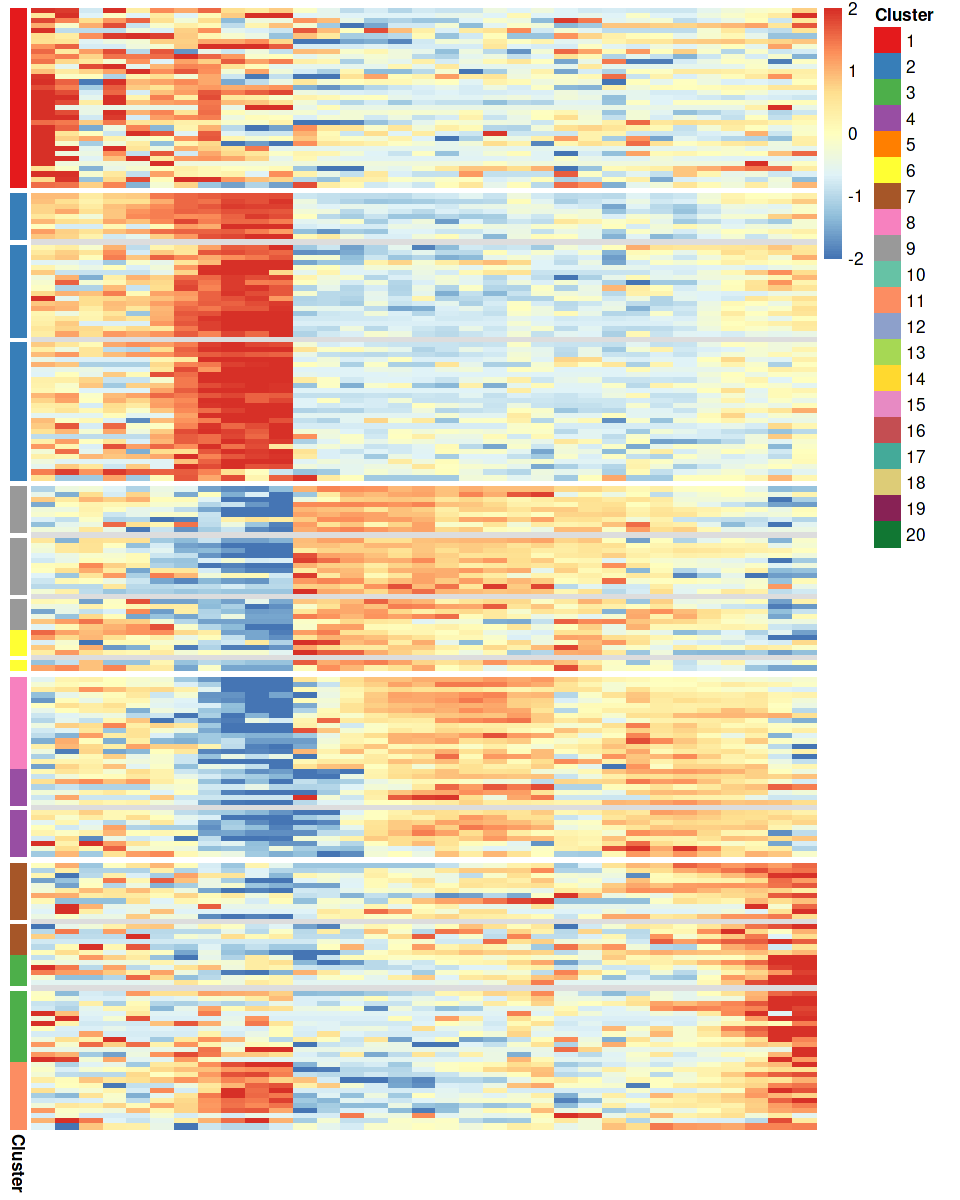

In [62]:
# Display the heatmap
wi <- 8
he <- 10
options(repr.plot.width = wi, repr.plot.height = he)
heatmap_plot_2 

# Save the heatmap
output_dir <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/GEO_seq_AP"
file_name <- paste0("tradeseq_AP", "heatmap", "E7_25_mx", ".pdf")
 ggsave(filename = file.path(output_dir, file_name), plot = heatmap_plot_2, device = "pdf",
        width = wi, height = he)


## Plot imputed gene expression in the primitive streak region

In [63]:
#DefaultAssay(seqFISH_filtered) <- "imputed"

In [64]:
#gene <- "Sox2"
#plot <- FeaturePlot(seqFISH_filtered, reduction = "spatial", feature = gene, pt.size = 3, order = TRUE) + coord_fixed()

# set the output directory
#output_dir = "projects/03_seqFISH_FINAL/code/GITHUB_SUBMISSION/outputs/tradeseq"

# set the filename
#    file_name <- paste0(gene,
#                       ".pdf")

# Save the grid plot as .svg file to specific file path
# ggsave(filename = file.path(output_dir, file_name), plot = plot, device = "pdf",
#      width = 4,
#      height = 4)

## Plot Hox gene expression along all the embryos

In [65]:
hox_genes <- c(
  "Hoxa1", "Hoxa2", "Hoxa3", "Hoxa4", "Hoxa5", "Hoxa6", "Hoxa7", "Hoxa9", "Hoxa10", "Hoxa11", "Hoxa13",
  "Hoxb1", "Hoxb2", "Hoxb3", "Hoxb4", "Hoxb5", "Hoxb6", "Hoxb7", "Hoxb8", "Hoxb9", "Hoxb13",
  "Hoxc4", "Hoxc5", "Hoxc6", "Hoxc8", "Hoxc9", "Hoxc10", "Hoxc11", "Hoxc12", "Hoxc13",
  "Hoxd1", "Hoxd3", "Hoxd4", "Hoxd8", "Hoxd9", "Hoxd10", "Hoxd11", "Hoxd12", "Hoxd13"
)

In [66]:
# Subset the original seqFISH data to include only the cells that passed QC
seqFISH_postQC_ss <- seqFISH_postQC[, seqFISH_postQC@meta.data$joint_clusters_pass_QC == TRUE]

# Extract the metadata for the subset of cells that passed QC
seqFISH_postQC_ss_meta <- seqFISH_postQC_ss@meta.data

# Transpose the imputed counts data for cells that passed QC
seqFISH_passQC_imputed_counts <- t(seqFISH_postQC_ss@assays$imputed@data)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from shila_umap_ to shilaumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from stabmap_umap_ to stabmapumap_”


In [67]:
# Subset the imputed counts data to include only the Hox genes
seqFISH_passQC_imputed_counts_hox_genes <- seqFISH_passQC_imputed_counts[, hox_genes]

# Convert the matrix of Hox gene expressions to a data frame for easier manipulation
seqFISH_passQC_imputed_counts_hox_genes <- as.data.frame(seqFISH_passQC_imputed_counts_hox_genes)

# Add a cell_ID column to the data frame, using row names as the cell IDs
seqFISH_passQC_imputed_counts_hox_genes$cell_ID <- row.names(seqFISH_passQC_imputed_counts_hox_genes)

# Prepare the data frames for merging
df1 <- seqFISH_passQC_imputed_counts_hox_genes  # Hox gene expression data with cell IDs
df2 <- seqFISH_postQC_ss_meta  # Metadata for cells that passed QC

# Merge the Hox gene expression data with the metadata by cell_ID
merged_df <- merge(df1, df2, by = "cell_ID")

# Set the row names of the merged data frame to be the cell_IDs
rownames(merged_df) <- merged_df$cell_ID

In [68]:
colnames(merged_df)

[1] "cell_ID"                                             
  [2] "Hoxa1"                                               
  [3] "Hoxa2"                                               
  [4] "Hoxa3"                                               
  [5] "Hoxa4"                                               
  [6] "Hoxa5"                                               
  [7] "Hoxa6"                                               
  [8] "Hoxa7"                                               
  [9] "Hoxa9"                                               
 [10] "Hoxa10"                                              
 [11] "Hoxa11"                                              
 [12] "Hoxa13"                                              
 [13] "Hoxb1"                                               
 [14] "Hoxb2"                                               
 [15] "Hoxb3"                                               
 [16] "Hoxb4"                                               
 [17] "Hoxb5"                                               
 [18] "Hoxb6"                                               
 [19] "Hoxb7"                                               
 [20] "Hoxb8"                                               
 [21] "Hoxb9"                                               
 [22] "Hoxb13"                                              
 [23] "Hoxc4"                                               
 [24] "Hoxc5"                                               
 [25] "Hoxc6"                                               
 [26] "Hoxc8"                                               
 [27] "Hoxc9"                                               
 [28] "Hoxc10"                                              
 [29] "Hoxc11"                                              
 [30] "Hoxc12"                                              
 [31] "Hoxc13"                                              
 [32] "Hoxd1"                                               
 [33] "Hoxd3"                                               
 [34] "Hoxd4"                                               
 [35] "Hoxd8"                                               
 [36] "Hoxd9"                                               
 [37] "Hoxd10"                                              
 [38] "Hoxd11"                                              
 [39] "Hoxd12"                                              
 [40] "Hoxd13"                                              
 [41] "orig.ident"                                          
 [42] "nCount_originalexp"                                  
 [43] "nFeature_originalexp"                                
 [44] "dim1"                                                
 [45] "dim2"                                                
 [46] "dim3"                                                
 [47] "sample_id"                                           
 [48] "embryo"                                              
 [49] "pos"                                                 
 [50] "fov"                                                 
 [51] "Experiment"                                          
 [52] "DataStage"                                           
 [53] "Estage"                                              
 [54] "pixel_width"                                         
 [55] "area_um2"                                            
 [56] "sum"                                                 
 [57] "detected"                                            
 [58] "total"                                               
 [59] "quality_keep"                                        
 [60] "sizeFactor"                                          
 [61] "within_timepoint_integration_snn_res.1"              
 [62] "seurat_clusters"                                     
 [63] "nearest_cell_label_transfer"                         
 [64] "extended_atlas_celltype_transfer"                    
 [65] "stage_transfer"                                      
 [66] "anatomy_transfer"             

In [69]:
plot_hox_expression <- function(df, gene_name, stages_colors) {
  # Create a dynamic column name for the Hox gene
  gene_column <- sym(gene_name)
  
  # Bin the AP axis into chunks of size 1 and group by Estage
  df_binned <- df %>%
    mutate(AP_bin = floor(AP)) %>%  # Create bins by flooring AP axis values
    group_by(AP_bin, Estage) %>%  # Group by both bins and Estage
    summarise(gene_avg = mean(!!gene_column, na.rm = TRUE))  # Calculate the average expression for each bin and Estage
  
  # Plot the binned average expression with a smooth curve and confidence interval
  ggplot(df_binned, aes(x = AP_bin, y = gene_avg, color = Estage)) +
    geom_point(size = 2) +  # Scatter plot of binned averages
    geom_smooth(method = "loess", se = TRUE, aes(fill = Estage), color = NA) +  # Smooth curve with matching confidence interval color
    scale_x_reverse() +  # Reverse the x-axis
    scale_color_manual(values = stages_colors) +  # Set custom colors for Estage
    scale_fill_manual(values = stages_colors) +  # Set the fill color of the CI to match the line color
    labs(title = paste("Binned", gene_name, "Gene Expression Along the AP Axis by Estage"),
         x = "AP Axis Position (Binned)",
         y = paste("Average", gene_name, "Expression Level")) +
    theme_void() +  # Start with a clean theme
    ggtitle(NULL) +
    theme(legend.position = "none"
      #axis.line = element_line(),       # Add axis lines
      #axis.ticks = element_line(),      # Add axis ticks
      #axis.text = element_text(),       # Add axis text (labels)
      #axis.ticks.length = unit(0.25, "cm") # Customize the length of the ticks
    )
}

# Example usage:
# Define a custom color palette for Estage

p1 <- plot_hox_expression(merged_df, "Hoxa1", stages_colors)
p2 <- plot_hox_expression(merged_df, "Hoxa2", stages_colors)
p3 <- plot_hox_expression(merged_df, "Hoxa4", stages_colors)
p4 <- plot_hox_expression(merged_df, "Hoxa6", stages_colors)
p5 <- plot_hox_expression(merged_df, "Hoxa7", stages_colors)
p6 <- plot_hox_expression(merged_df, "Hoxa11", stages_colors)

`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


png 
  2

Plot saved to projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/hoxa_gene_expression.pdf

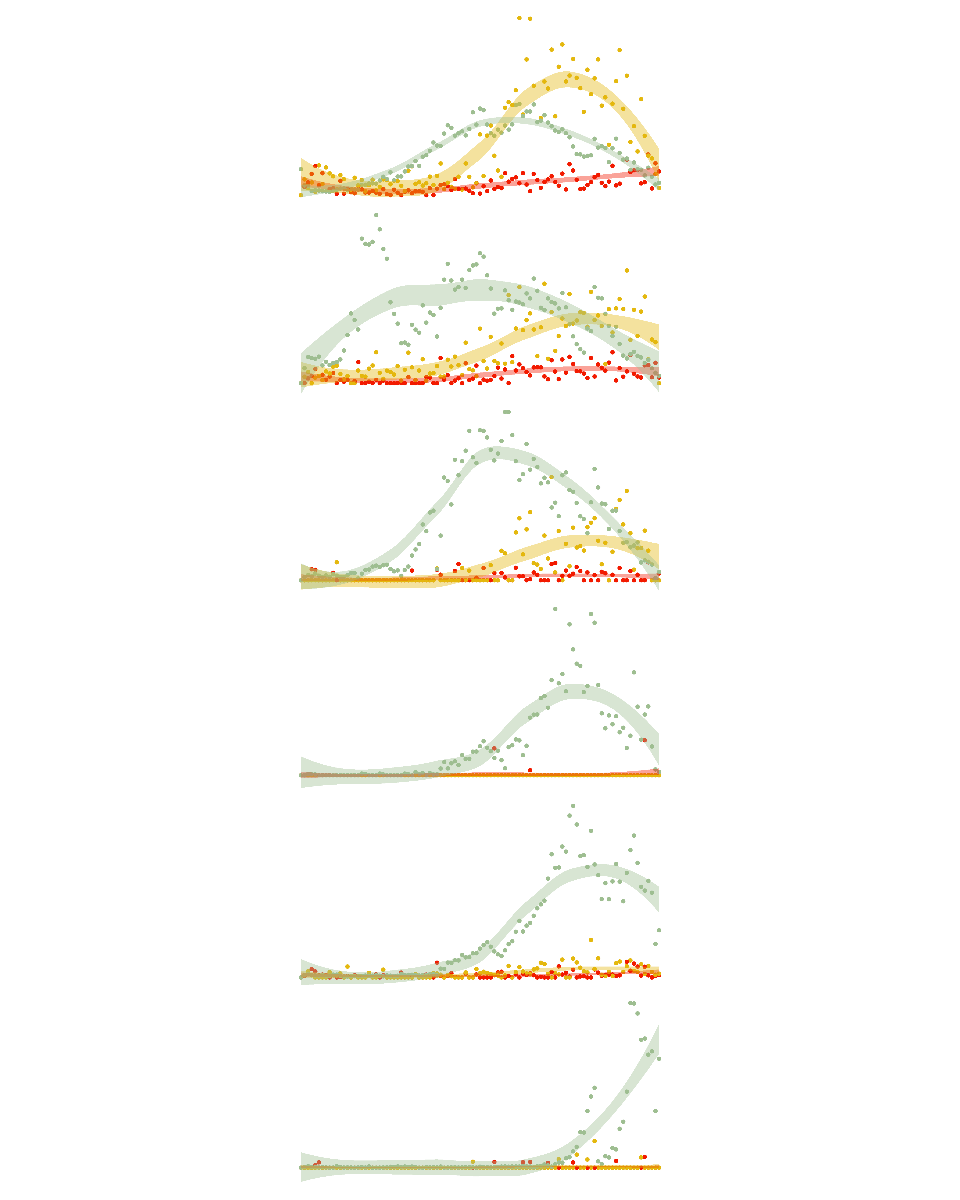

In [70]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 3.5, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)
p4_raster <- rasterize_plot(p4)
p5_raster <- rasterize_plot(p5)
p6_raster <- rasterize_plot(p6)
#p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
#p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3, p4,p5, p6,
  ncol = 1, nrow = 6) +
  plot_layout(
    widths = c(1),
    heights = c(1,1,1,1,1,1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/hoxa_gene_expression.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, height = (150/4), width = ((200/4)*1/5))
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

In [71]:
plot_hox_expression <- function(df, gene_name, stages_colors) {
  # Create a dynamic column name for the Hox gene
  gene_column <- sym(gene_name)
  
  # Bin the AP axis into chunks of size 1 and group by Estage
  df_binned <- df %>%
    mutate(AP_bin = floor(AP)) %>%  # Create bins by flooring AP axis values
    group_by(AP_bin, Estage) %>%  # Group by both bins and Estage
    summarise(gene_avg = mean(!!gene_column, na.rm = TRUE))  # Calculate the average expression for each bin and Estage
  
  # Plot the binned average expression with a smooth curve and confidence interval
  ggplot(df_binned, aes(x = AP_bin, y = gene_avg, color = Estage)) +
    geom_point(size = 2) +  # Scatter plot of binned averages
    geom_smooth(method = "loess", se = TRUE, aes(fill = Estage), color = NA) +  # Smooth curve with matching confidence interval color
    scale_x_reverse() +  # Reverse the x-axis
    scale_color_manual(values = stages_colors) +  # Set custom colors for Estage
    scale_fill_manual(values = stages_colors) +  # Set the fill color of the CI to match the line color
    labs(title = paste("Binned", gene_name, "Gene Expression Along the AP Axis by Estage"),
         x = "AP Axis Position (Binned)",
         y = paste("Average", gene_name, "Expression Level")) +
    theme_void() +  # Start with a clean theme
    ggtitle(NULL) +
    theme(legend.position = "none"
      #axis.line = element_line(),       # Add axis lines
      #axis.ticks = element_line(),      # Add axis ticks
      #axis.text = element_text(),       # Add axis text (labels)
      #axis.ticks.length = unit(0.25, "cm") # Customize the length of the ticks
    )
}

# Example usage:
# Define a custom color palette for Estage

p1 <- plot_hox_expression(merged_df, "Hoxb1", stages_colors)
p2 <- plot_hox_expression(merged_df, "Hoxb2", stages_colors)
p3 <- plot_hox_expression(merged_df, "Hoxb4", stages_colors)
p4 <- plot_hox_expression(merged_df, "Hoxb6", stages_colors)
p5 <- plot_hox_expression(merged_df, "Hoxb7", stages_colors)
p6 <- plot_hox_expression(merged_df, "Hoxb9", stages_colors)

`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'AP_bin'. You can override using the
`.groups` argument.


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


png 
  2

Plot saved to projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/hoxb_gene_expression.pdf

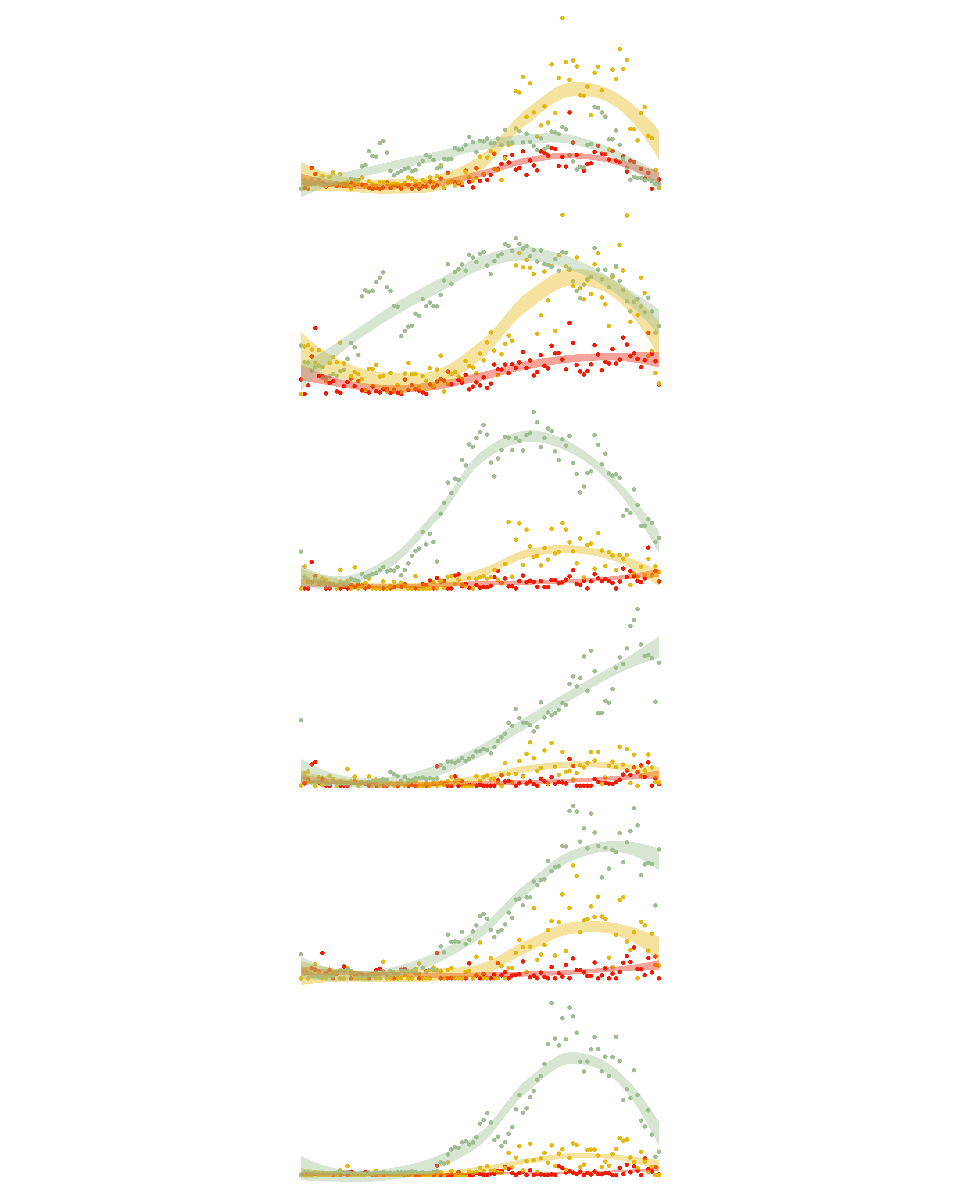

In [72]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 3.5, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)
p4_raster <- rasterize_plot(p4)
p5_raster <- rasterize_plot(p5)
p6_raster <- rasterize_plot(p6)
#p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
#p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3, p4,p5, p6,
  ncol = 1, nrow = 6) +
  plot_layout(
    widths = c(1),
    heights = c(1,1,1,1,1,1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_3/output/hoxb_gene_expression.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, height = (150/4), width = ((200/4)*1/5))
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

## Print out Package Versions

In [73]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] readxl_1.4.1                tibble_3.2.0               
 [3] png_0.1-8                   ggridges_0.5.4             
 [5] Cairo_1.6-0                 tidyr_1.3.0                
 [7] reshape2_1.4.4              tradeSeq_1.10.0            
 [9] viridis_0.6.2               viridisLite_0.4.1          
[11] batchelor_1.12